# Trabajo Práctico N°1 Aprendizaje Automático 1#
## Integrantes ##
1. López Ceratto, Julieta : L-3311/1
2. Rodríguez Griñó, Tomás : R-4643/4
3. Slepoy, David: S-5782/7

Importamos librerías necesarias.  

In [385]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Cargamos el dataset house-prices-tp.csv 

In [386]:
df = pd.read_csv('src\house-prices-tp.csv', sep = ',')

In [387]:
#Eliminamos valores que contienen NaN en la variable a predecir
df = df.dropna(subset=['MEDV'])

Eliminamos las filas que contengan 7 valores nulos o más ya que consideramos que no aportan gran cantidad de detalles para la prediccion.

In [388]:
#Primero chequeamos que el % de filas con esta condición sea < 5% / < 0.05
mayor_igual_7 = len(df) - len(df.dropna(thresh=7))
mayor_igual_7 / len(df)

0.005607476635514018

In [389]:
#Como es menor a 5%, se las elimina

df.dropna(thresh=7, inplace=True)

# Análisis descriptivo #

En este apartado se realiza un análisis descriptivo de cada variable.

Primero se divide el dataset en conjuntos de training, validación y test.

In [390]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [391]:
# Paso 1: Dividir en train+val y test (20% para test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Dividir train+val en train y validation (30% de train+val para validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

## 1. Análisis, visualización de variables y decisión sobre datos faltantes. ##

## 1. Datos Faltantes ##

In [392]:
#Miramos que columnas tienen datos faltantes
X_train.isnull().sum()

CRIM       5
ZN         5
INDUS      1
CHAS       5
NOX        5
RM         4
AGE        5
DIS        2
RAD        6
TAX        4
PTRATIO    2
B          4
LSTAT      6
dtype: int64

Se puede observar que todas las columnas tienen datos faltantes.

Chequeamos que no haya filas duplicadas antes de proceder a la imputación de datos faltantes.

In [393]:
X_train.duplicated().sum()

0

Una vez que nos sercioramos que no haya filas duplicadas, procedemos a realizar la imputación de datos faltantes.

### Imputación de datos faltantes por K-N Vecinos más cercanos (KNN) ###

In [394]:
##Elegimos 5 vecinos más cercanos
imputer = KNNImputer(n_neighbors=5) 
X_train = imputer.fit_transform(X_train)

In [395]:
X_train = pd.DataFrame(X_train, columns=list(X.columns))
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
1,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
2,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
3,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
4,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00
293,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14
294,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60
295,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82


In [396]:
X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [397]:
X_train['CHAS'] = X_train['CHAS'].round()

### 2. Análisis descriptivo ###

In [398]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,5.345792,12.287388,11.440184,0.077441,0.562136,6.312509,67.619521,3.836675,9.380414,407.873447,18.312216,353.581289,12.971551
std,13.291733,24.455318,6.849599,0.267741,0.121111,0.759140,27.948552,2.176540,8.520171,164.422525,2.267497,94.440877,7.387047
min,0.010960,0.000000,0.460000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081990,0.000000,5.190000,0.000000,0.453000,5.877000,43.400000,2.072000,4.000000,277.000000,16.634925,374.680000,7.140000
50%,0.318270,0.000000,10.010000,0.000000,0.538000,6.208000,74.900000,3.360300,5.000000,337.000000,18.700000,391.130000,11.650000
75%,4.555870,17.441575,18.100000,0.000000,0.647000,6.718000,93.400000,5.214600,17.110181,614.073104,20.200000,396.420000,17.270000
max,88.976200,98.464003,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.220301


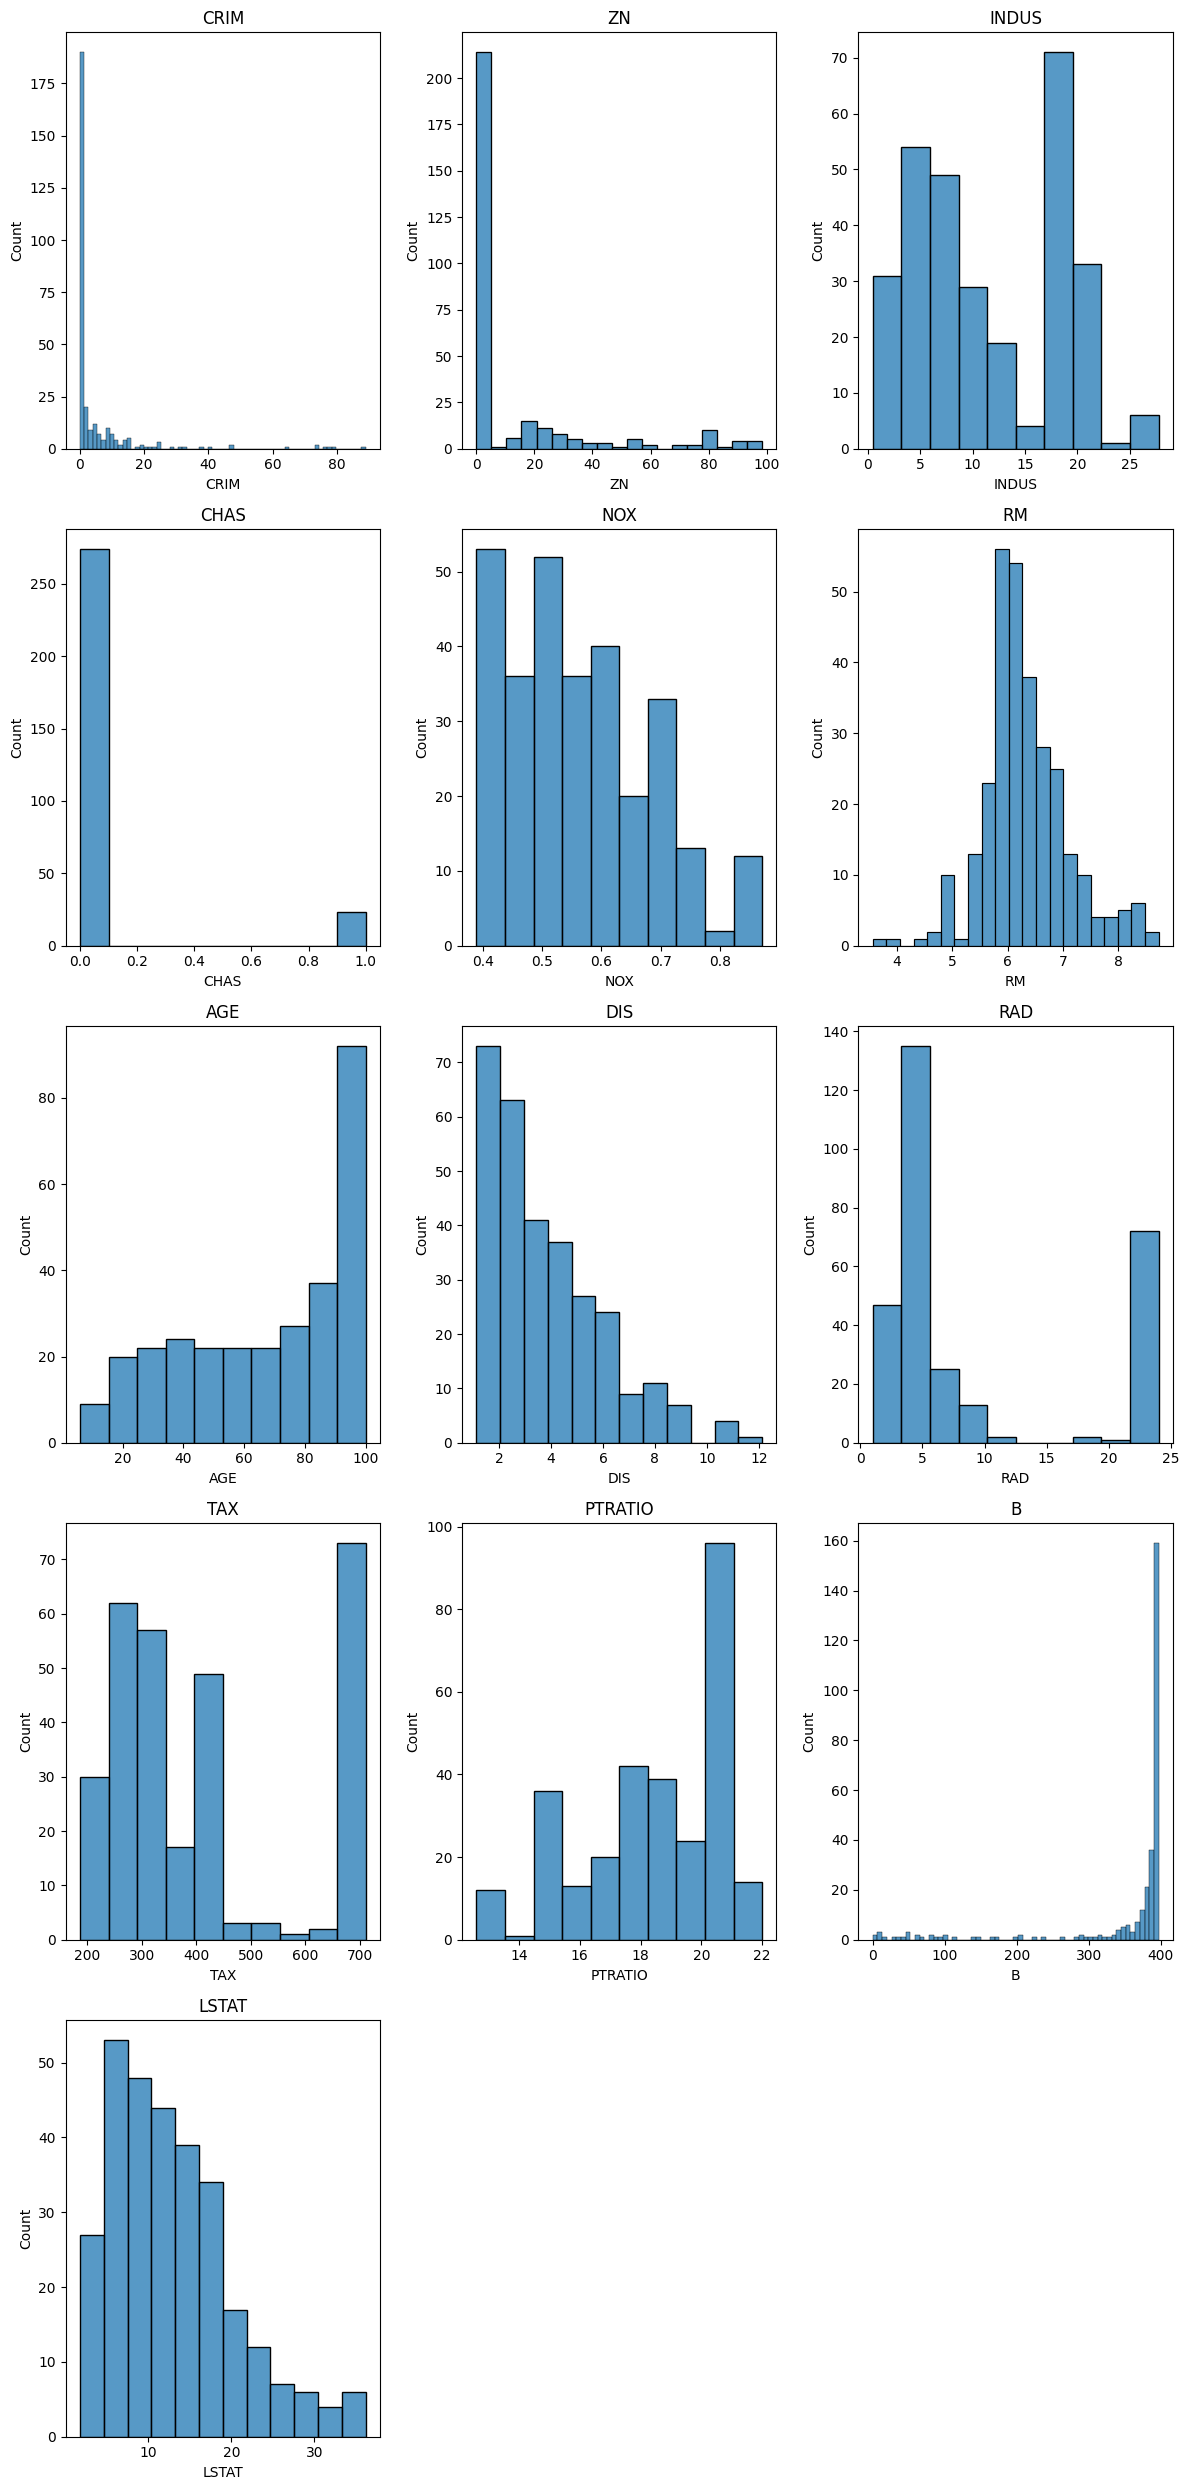

In [399]:
def hist_plot(df):
    l = len(df.columns)
    # Determina el número de filas
    rows = (l + 2) // 3
    cols = 3  # Tres columnas por fila
    
    # Crear los subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten()  # Aplana los ejes para fácil indexación
    
    # Graficar cada columna en su respectivo subplot
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)
    
    # Eliminar subplots vacíos si el número de columnas no es múltiplo de 3
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


hist_plot(X_train)
    

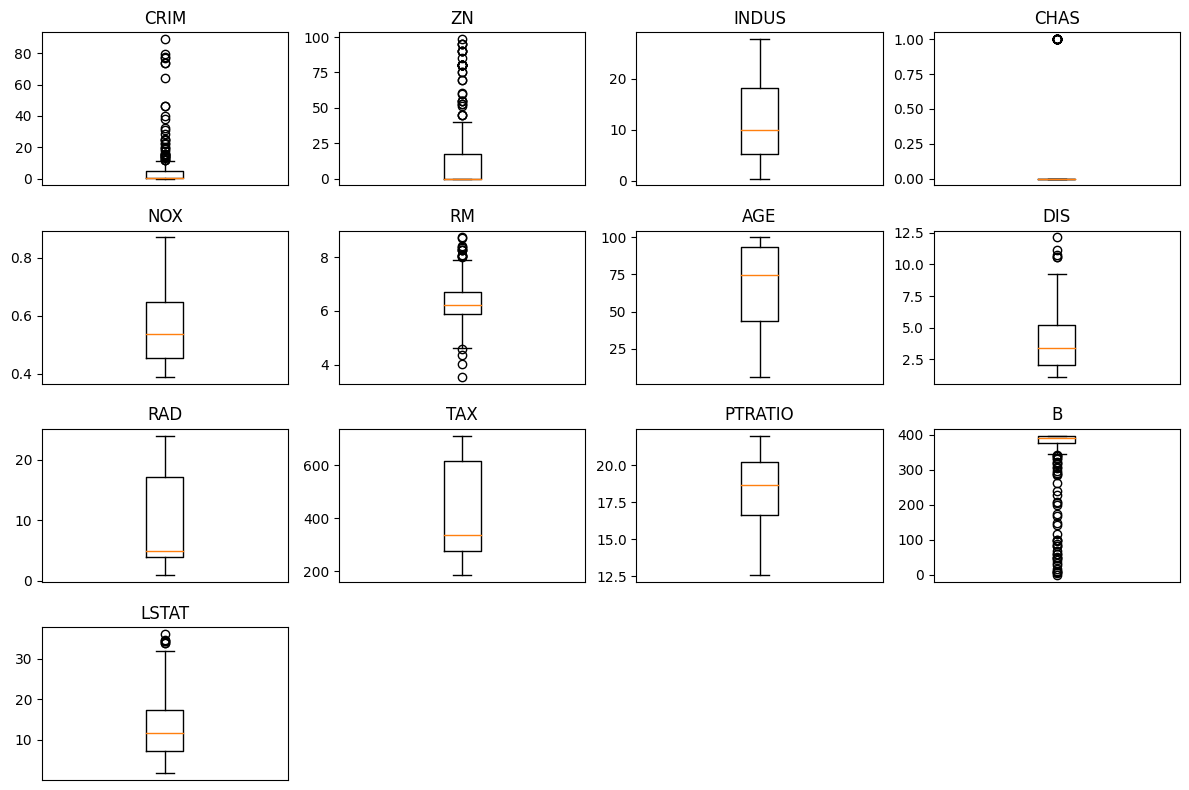

In [400]:
# Crear diagrama de caja individual para cada variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(X_train[column])
    plt.title(column)
    plt.xticks([])  # Eliminar marcas en el eje x
plt.tight_layout()
plt.show()

#### Descripción de variables:
1. En la variable CRIM, al ser la tasa de criminalidad per cápita por ciudad, podemos observar que es una variable cuantitativa, continua. Podemos ver que tiene una distribución unimodal, sesgada a la derecha, con una moda con valores cercanos a cero. Gracias al boxplot, podemos observar que posee valores atípicos aproximadamente en los valores mayores a 16.

2. En la variable ZN, al ser la proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados, podemos observar que es una variable cuantitativa continua. También podemos ver que tiene una distribución unimodal sesgada a la derecha, con una moda con valores cercanos a cero. Gracias al boxplot, podemos notar que posee valores atípicos en los valores mayores a 45.

3. En la variable INDUS, al ser la proporción de acres de negocios no minoristas por ciudad, podemos observar que es una variable cuantitativa continua. También podemos ver que tiene una distribución bimodal, con picos en los valores cercanos al 18 y al 5. Gracias al boxplot, podemos notar que esta variable no posee valores atípicos.

4. En la variable CHAS, que asigna valores de 1 si el tramo limita con el río, y 0 de lo contrario, podemos observar que es una variable cualitativa binaria. Por lo tanto, no podemos sacar conclusiones con el histograma, ya que solo arroja valores de unos y ceros. Gracias al boxplot, podemos ver que los valores atípicos son los que tienen valor uno, ya que son pocos con respecto a los ceros.

5. En la variable NOX, al ser la concentración de óxidos de nitrógeno (partes por 10 millones), podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que tiene una distribución uniforme. Gracias al boxplot, podemos notar que no posee valores atípicos.

6. En la variable RM, al ser el número promedio de habitaciones por vivienda, podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que tiene una distribución normal. Gracias al boxplot, podemos ver que posee valores atípicos en las colas.

7. En la variable AGE, al ser la proporción de unidades ocupadas por sus propietarios construidas antes de 1940, podemos observar que es una variable cuantitativa continua. Gracias al histograma, podemos ver que tiene una distribución unimodal, sesgada a la izquierda, con una moda con valores de 100. Gracias al boxplot, podemos notar que esta variable no posee valores atípicos.

8. En la variable DIS, al ser la distancia ponderada a cinco centros de empleo de Boston, podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que es una variable unimodal, sesgada a la derecha, con una moda en los valores cercanos a dos. Gracias al boxplot, podemos notar que posee valores atípicos con valores mayores a 10.

9. En la variable RAD, al ser el índice de accesibilidad a las autopistas radiales, podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que tiene una distribución bimodal, con picos en los valores cercanos al 5 y al 24. Gracias al boxplot, podemos ver que no posee valores atípicos.

10. En la variable TAX, al ser la tasa de impuesto sobre la propiedad a valor completo por $10,000, podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que posee una distribución bimodal con picos en los valores cercanos a 350 y 700. Gracias al boxplot, podemos ver que esta variable no posee valores atípicos.

11. En la variable PTRATIO, al ser la proporción alumno-maestro por ciudad, podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que posee una distribución unimodal, sesgada a la izquierda, con una moda en valores cercanos al 21. Gracias al boxplot, podemos ver que no posee valores atípicos.

12. En la variable B, al ser el resultado de la ecuación B = 1000(Bk - 0.63)^2, donde Bk es la proporción de negros por ciudad, podemos observar que es una variable cuantitativa continua. Gracias al histograma, podemos ver que tiene una distribución unimodal, sesgada a la izquierda, con una moda en valores cercanos al 400. Gracias al boxplot, podemos notar que posee valores atípicos en los valores menores a 330.

13. En la variable LSTAT, al ser el porcentaje de población de menor estatus socioeconómico, podemos observar que es una variable cuantitativa, continua. Gracias al histograma, podemos ver que tiene una distribución unimodal, sesgada a la derecha, con una moda en valores entre 5 y 10. Gracias al boxplot, podemos notar que posee valores atípicos en los valores mayores a 31.

## 2. Correlación de variables.

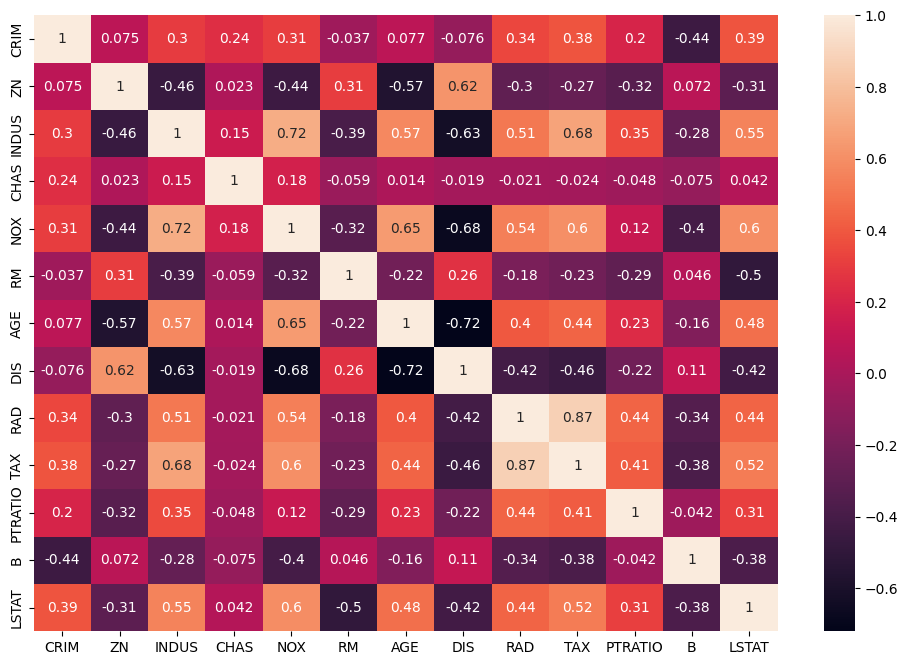

In [493]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [402]:
# Cremos l mtri de correlción
correlation_matrix = X_train.corr()

# Aplanmos la matriz de correlación y resetemos los índices
correlation_pairs = correlation_matrix.unstack().reset_index()

# Renombrmos las columnas
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Eliminamos las correlaciones duplicadas tanto la diagonal como las columnas
correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]

# Ordenamos por la mayor correlacion positiva
correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending=False)

correlation_pairs['Correlation'] = correlation_pairs['Correlation'].drop_duplicates()
correlation_pairs.dropna(inplace= True)

correlation_pairs.reset_index(inplace = True)
correlation_pairs.drop(columns= 'index', inplace = True)

# Mostramos las 10 pares de variables con mayor correlación positiva y las 10 pares de variables con mayor correlación negativa
print(correlation_pairs.head(10),'\n', correlation_pairs.tail(10))

  Variable 1 Variable 2  Correlation
0        RAD        TAX     0.874383
1        NOX      INDUS     0.718187
2        TAX      INDUS     0.679023
3        NOX        AGE     0.647762
4         ZN        DIS     0.621388
5        TAX        NOX     0.603485
6        NOX      LSTAT     0.596653
7      INDUS        AGE     0.572698
8      INDUS      LSTAT     0.552229
9        NOX        RAD     0.536448 
    Variable 1 Variable 2  Correlation
68      LSTAT        DIS    -0.423908
69          B       CRIM    -0.440239
70         ZN        NOX    -0.440579
71        DIS        TAX    -0.457093
72         ZN      INDUS    -0.464641
73         RM      LSTAT    -0.497231
74        AGE         ZN    -0.569013
75        DIS      INDUS    -0.627101
76        NOX        DIS    -0.675635
77        DIS        AGE    -0.720010


# Modelos

## Imputación de datos faltantes en X_val y X_test con el mismo criterio de KNN que X_train

In [403]:
X_val = pd.DataFrame(imputer.transform(X_val))
X_test = pd.DataFrame(imputer.transform(X_test))

## 1. LinearRegression

In [404]:
model_lr = make_pipeline(StandardScaler(),LinearRegression())
model_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [405]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [406]:
model_lr.steps[0][1]
model_lr.steps[1][1].coef_

array([ 0.62054435,  0.94286759, -0.12747426,  1.23703891,  0.13899735,
        3.86165989, -1.79772248, -2.54724881,  0.65968859, -1.53176201,
       -1.52567615,  0.35085977, -3.14810032])

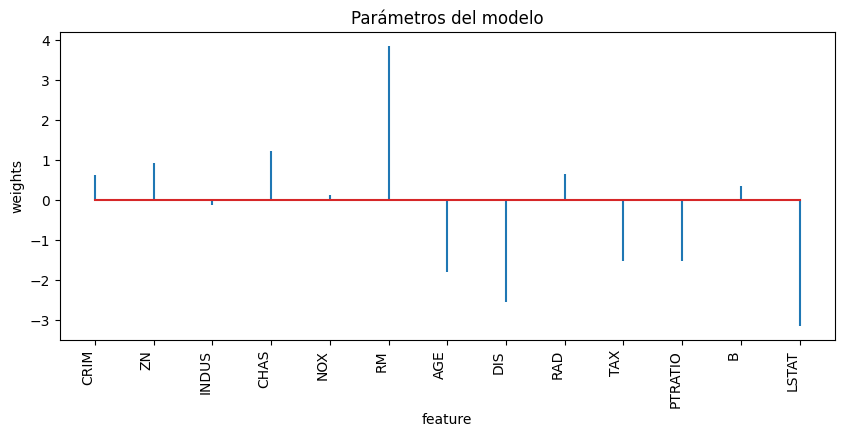

In [407]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model_lr.steps[1][1].coef_.flatten()})
# flatten() convierte el array de coeficientes en una versión unidimensional, independientemente de cuántas dimensiones tenga originalmente.
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

Podemos observar que la variable 'RM' es aquella con mayor peso en la predicción.

### Predicciones LinearRegression

In [408]:
# Predicciones
y_test_pred_lr = model_lr.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_test_pred_lr.shape, y_test.shape

((107,), (107,))

In [409]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_test_pred_lr, squared = False)

print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 5.718801878560619


### Residuos Linear Regression

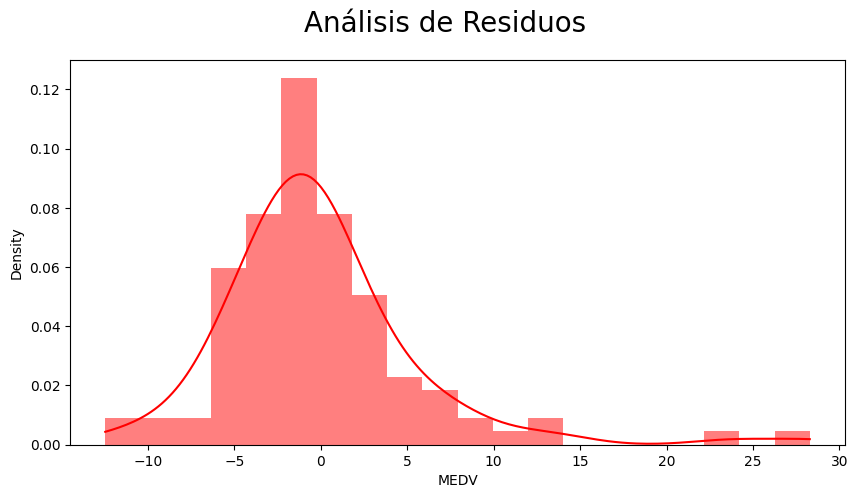

In [410]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_test_pred_lr), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

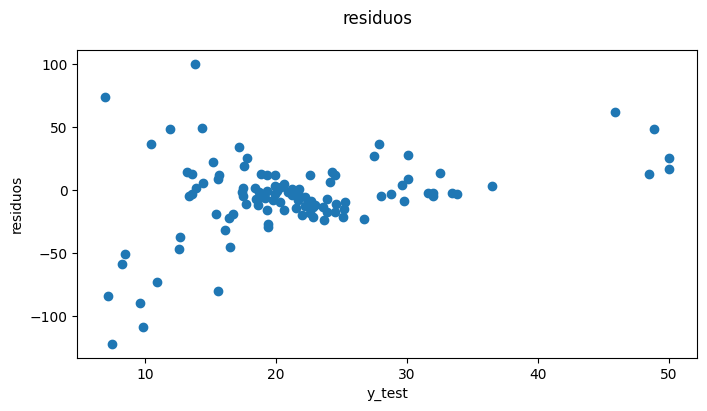

In [411]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_test_pred_lr)/y_test)
plt.show()

## 2. Gradiente descendiente

In [412]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [413]:
#X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
#X_val= X_val.values.reshape(-1, 1)
y_val= y_val.values.reshape(-1, 1)
#X_test= X_test.values.reshape(-1, 1)
y_test= y_test.values.reshape(-1, 1)

### Gradiente descendiente

In [414]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100, ax=None):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))
    
    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época
    train_errors_rmse = []
    test_errors_rmse = []
    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        train_mse = np.mean(error_train ** 2)
        train_rmse = np.sqrt(train_mse)
        train_errors.append(train_mse)
        train_errors_rmse.append(train_rmse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W) 
        error_test = y_val - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_rmse = np.sqrt(test_mse)
        test_errors.append(test_mse)
        test_errors_rmse.append(test_rmse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba en el subplot dado por ax
    if ax is not None:
        ax.plot(train_errors, label='Error de entrenamiento')
        ax.plot(test_errors, label='Error de validación')
        ax.set_xlabel('Época')
        ax.set_ylabel('Error cuadrático medio')
        ax.legend()
        ax.set_title(f'lr={lr}, epochs={epochs}')
    else:
        # Graficar errores de entrenamiento y prueba
        # Definir una figura
        plt.figure(figsize=(12, 6))
        # Plotear errores de entrenamiento
        plt.plot(train_errors, label='Error de entrenamiento')
        # Plotear errores de prueba
        plt.plot(test_errors, label='Error de validación')
        # Poner labels en los ejes
        plt.xlabel('Época')
        plt.ylabel('Error cuadrático medio')
        # Activar la leyenda
        plt.legend()
        # Poner titulo
        plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
        # Terminar y mostrar gráfico
        plt.show()
    
    return W, train_errors[-5:], test_errors[-5:], train_errors_rmse[-5:],test_errors_rmse[-5:]

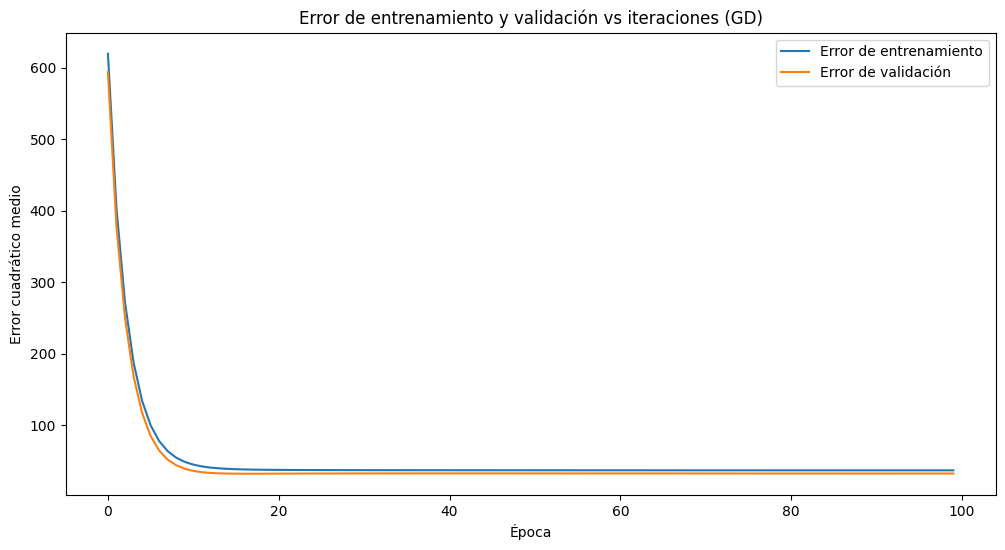

In [415]:
w, mse_train_gd, mse_val_gd, rmse_train_gd, rmse_val_gd = gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, lr=0.1, epochs=100)


### Gradiente Descendiente Estocástico 

In [416]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, ax=None):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []
    train_errors_rmse = []
    test_errors_rmse = []
    
    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = np.mean(error ** 2)
            train_rmse = np.sqrt(train_mse)
            train_errors.append(train_mse)
            train_errors_rmse.append(train_rmse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_rmse = np.sqrt(test_mse)
            test_errors.append(test_mse)
            test_errors_rmse.append(test_rmse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

    # Graficar en el subplot especificado por ax
    if ax is not None:
        ax.plot(train_errors, label='Error de entrenamiento')
        ax.plot(test_errors, label='Error de prueba')
        ax.set_xlabel('Iteración')
        ax.set_ylabel('Error cuadrático medio')
        ax.legend()
        ax.set_title(f'lr={lr}, epochs={epochs}')
    else:
        plt.figure(figsize=(12, 6))
        plt.plot(train_errors, label='Error de entrenamiento')
        plt.plot(test_errors, label='Error de prueba')
        plt.xlabel('Iteración')
        plt.ylabel('Error cuadrático medio')
        plt.legend()
        plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
        plt.show()

    return W, train_errors[-5:], test_errors[-5:], train_errors_rmse[-5:],test_errors_rmse[-5:]


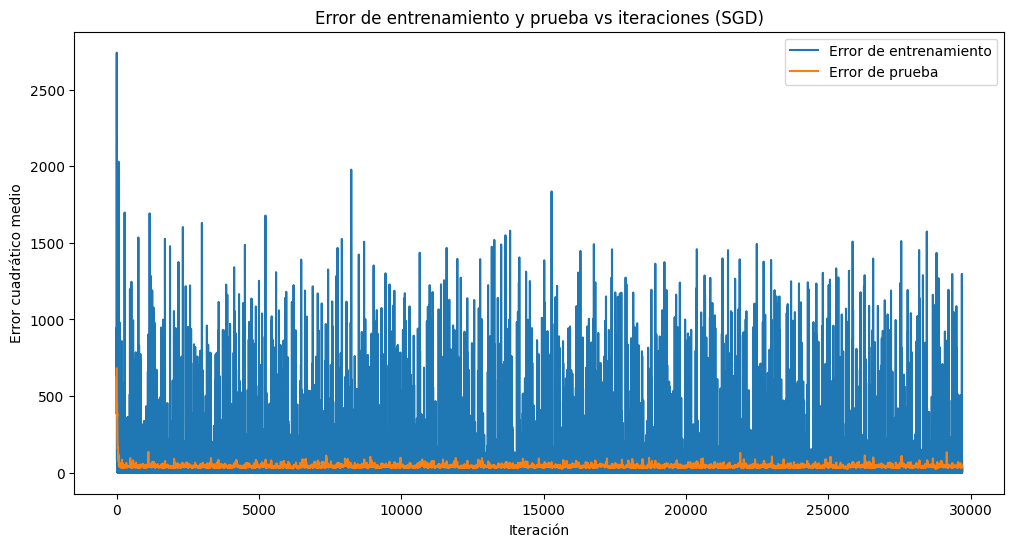

In [417]:
w_gds, mse_train_gds, mse_val_gds, rmse_train_gds, rmse_val_gds = stochastic_gradient_descent(X_train_scaled,y_train, X_val_scaled, y_val, lr = 0.01, epochs= 100)

### Gradiente Descendiente Mini-Batch

In [418]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11, ax=None):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []
    train_errors_rmse = []
    test_errors_rmse = []   

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_rmse = np.sqrt(train_mse)
            train_errors.append(train_mse)
            train_errors_rmse.append(train_rmse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size
            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_rmse = np.sqrt(test_mse)
            test_errors.append(test_mse)
            test_errors_rmse.append(test_rmse)

    # Ahora graficamos en el subplot proporcionado por `ax`
    if ax is not None:
        ax.plot(train_errors, label='Error de entrenamiento')
        ax.plot(test_errors, label='Error de prueba')
        ax.set_xlabel('Iteración')
        ax.set_ylabel('Error cuadrático medio')
        ax.legend()
        ax.set_title(f'lr={lr}, epochs={epochs}, batch = {batch_size}')
    else:
        plt.figure(figsize=(12, 6))
        plt.plot(train_errors, label='Error de entrenamiento')
        plt.plot(test_errors, label='Error de prueba')
        plt.xlabel('Iteración')
        plt.ylabel('Error cuadrático medio')
        plt.legend()
        plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
        plt.show()

    return W, train_errors[-5:], test_errors[-5:], train_errors_rmse[-5:],test_errors_rmse[-5:]


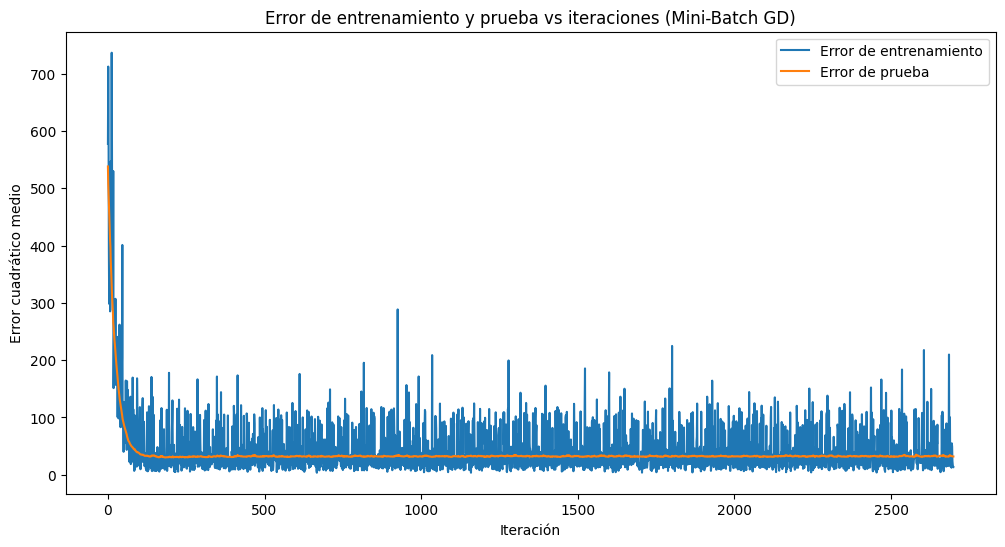

In [419]:
w_gdmb, mse_train_gdmb, mse_val_gdmb, rmse_train_gdmb, rmse_val_gdmb = mini_batch_gradient_descent(X_train_scaled,y_train, X_val_scaled, y_val, lr = 0.01, epochs = 100, batch_size= 11)

## 3. Métodos de regularización: Lasss, Ridge y Elastic Net ###

#### Ajuste de los modelos ####

In [420]:
#Ajuste del modelo Lasso
model_ls = make_pipeline(StandardScaler(), Lasso())
model_ls.fit(X_train,y_train)

#Ajuste del modelo Ridge
model_rid = make_pipeline(StandardScaler(), Ridge())
model_rid.fit(X_train, y_train)

#Ajuste del modelo ElasticNet
model_elastic = make_pipeline(StandardScaler(), ElasticNet())
model_elastic.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

### Visualización de los coeficientes ###

In [421]:
df__lasso_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model_ls.steps[1][1].coef_.flatten()})
df__rid_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model_rid.steps[1][1].coef_.flatten()})
df__elastic_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model_rid.steps[1][1].coef_.flatten()})
# flatten() convierte el array de coeficientes en una versión unidimensional, independientemente de cuántas dimensiones tenga originalmente.

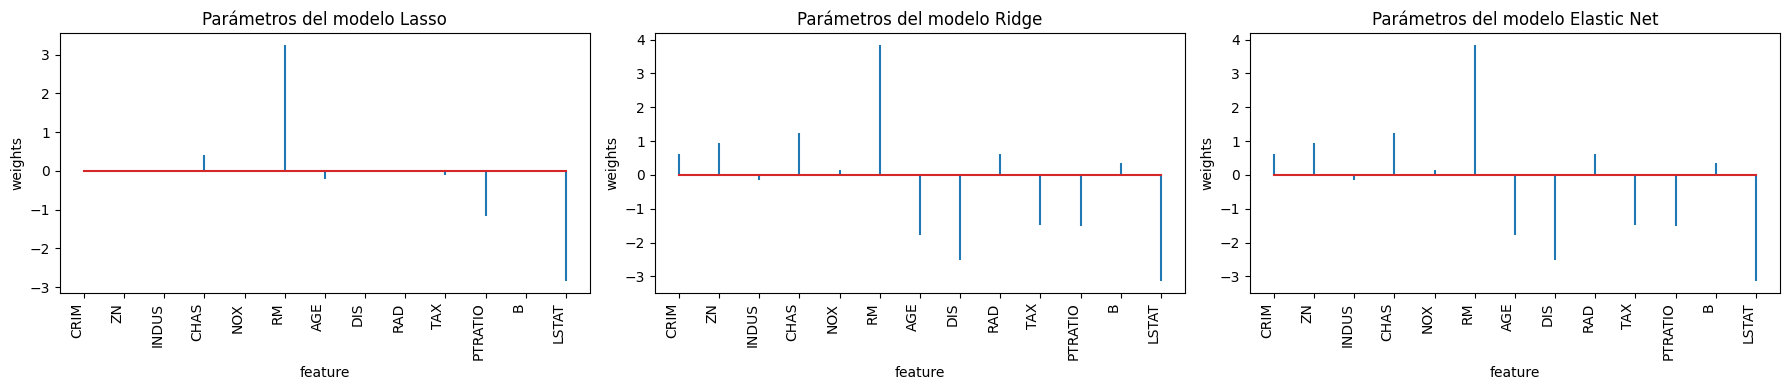

In [422]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Grafico de parametros Lasso
axes[0].stem(df__lasso_coeficientes.predictor, df__lasso_coeficientes.coef, markerfmt=' ')
axes[0].set_xticklabels(df__lasso_coeficientes.predictor, rotation=90, ha='right', size=10)
axes[0].set_xlabel('feature')
axes[0].set_ylabel('weights')
axes[0].set_title('Parámetros del modelo Lasso')

# Grafico de parametros Ridge
axes[1].stem(df__rid_coeficientes.predictor, df__rid_coeficientes.coef, markerfmt=' ')
axes[1].set_xticklabels(df__rid_coeficientes.predictor, rotation=90, ha='right', size=10)
axes[1].set_xlabel('feature')
axes[1].set_ylabel('weights')
axes[1].set_title('Parámetros del modelo Ridge')

# Grafico de parametros Elastic Net
axes[2].stem(df__elastic_coeficientes.predictor, df__elastic_coeficientes.coef, markerfmt=' ')
axes[2].set_xticklabels(df__elastic_coeficientes.predictor, rotation=90, ha='right', size=10)
axes[2].set_xlabel('feature')
axes[2].set_ylabel('weights')
axes[2].set_title('Parámetros del modelo Elastic Net')

plt.tight_layout()
plt.show()

Se puede observar como Lasso, a diferencia del modelo de Regresión Lineal simple, elimina (asigna coeficiente 0), a las variables:
- CRIM
- ZN
- INDUA
- NOX
- DIS
- RAD
- B

Y con coedicientes muy pequeños a:
- TAX
- AGE
- CHAS

Asignándole valores más representativos a:
- RM
- PTRATIO
- LSTAT 

Por otro lado, se puede observar como Ridge, a diferencia del modelo Lasso. Este mantiene las variables muy parecidas que en el modelo de regresión lineal. 

### Predicciones de los 3 modelos ###

In [423]:
# Predicciones Lasso
y_lasso_val_pred = model_ls.predict(X_val)
y_lasso_val_pred.shape, y_val.shape

#Precicciones Ridge
y_ridge_val_pred = model_rid.predict(X_val)
y_ridge_val_pred.shape, y_val.shape

#Predicciones Elastic Net
y_elastic_val_pred = model_elastic.predict(X_val)
y_elastic_val_pred.shape, y_val.shape

((128,), (128, 1))

### Visualización de Residuos ###

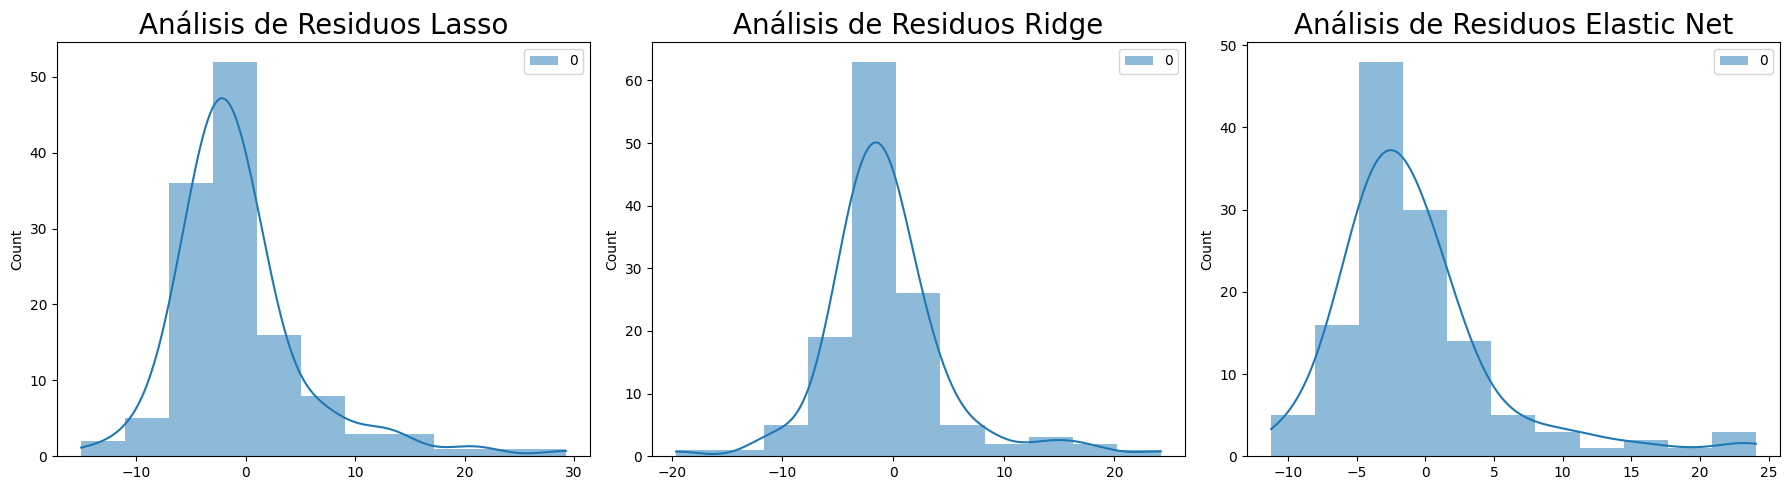

In [424]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Primer gráfico
sns.histplot(y_val - y_lasso_val_pred.reshape(-1,1), color="red", kde=True, linewidth=0, bins=round(sqrt(len(y_val))), ax=axes[0])
axes[0].set_title('Análisis de Residuos Lasso', fontsize=20)


# Segundo gráfico
sns.histplot(y_val - y_ridge_val_pred.reshape(-1,1), color="red", kde=True, linewidth=0, bins=round(sqrt(len(y_val))), ax=axes[1])
axes[1].set_title('Análisis de Residuos Ridge', fontsize=20)


# Tercer gráfico
sns.histplot(y_val - y_elastic_val_pred.reshape(-1,1), color="r", kde=True, linewidth=0, bins=round(sqrt(len(y_val))), ax=axes[2])
axes[2].set_title('Análisis de Residuos Elastic Net', fontsize=20)


plt.tight_layout()
plt.show()

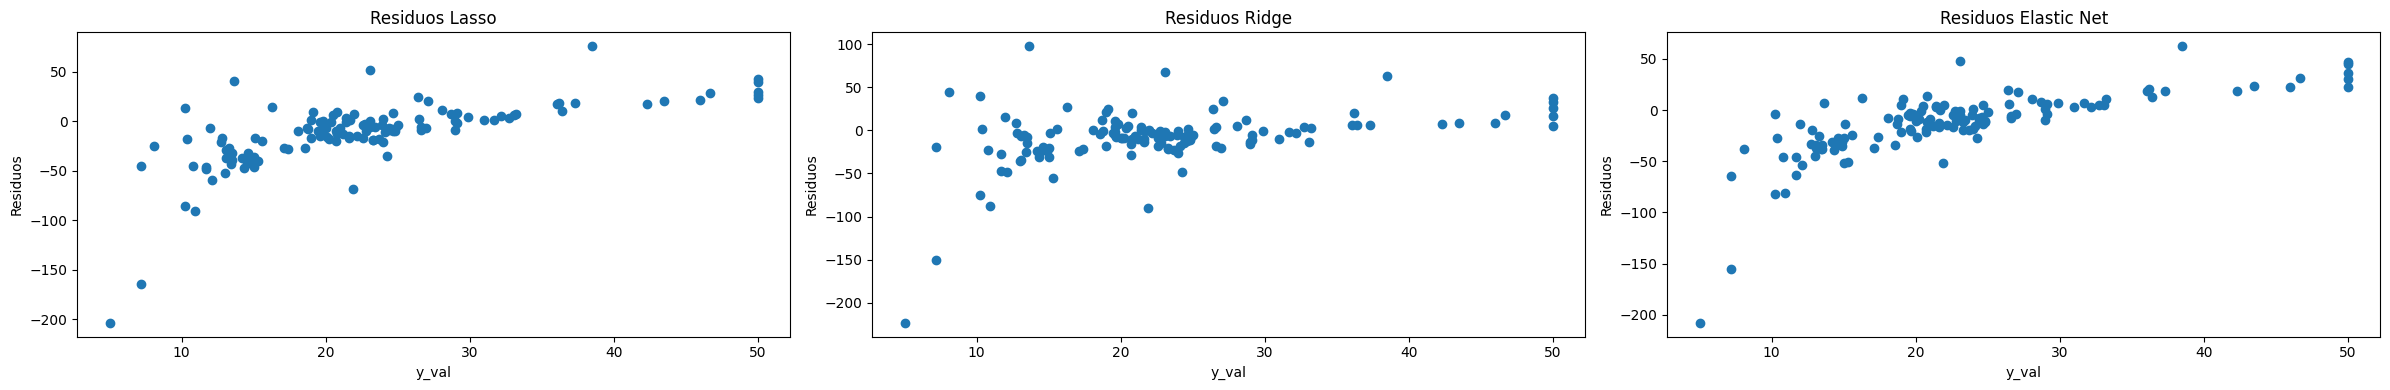

In [425]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4))

# Residuos de Lasso
axes[0].scatter(y_val, 100 * (y_val - y_lasso_val_pred.reshape(-1, 1)) / y_val)
axes[0].set_title('Residuos Lasso')
axes[0].set_xlabel('y_val')
axes[0].set_ylabel('Residuos')

# Residuos de Ridge
axes[1].scatter(y_val, 100 * (y_val - y_ridge_val_pred.reshape(-1, 1)) / y_val)
axes[1].set_title('Residuos Ridge')
axes[1].set_xlabel('y_val')
axes[1].set_ylabel('Residuos')

# Residuos de Elastic Net
axes[2].scatter(y_val, 100 * (y_val - y_elastic_val_pred.reshape(-1, 1)) / y_val)
axes[2].set_title('Residuos Elastic Net')
axes[2].set_xlabel('y_val')
axes[2].set_ylabel('Residuos')

plt.tight_layout()
plt.show()

In [426]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir
rmse_ols_lasso = mean_squared_error(y_val, y_lasso_val_pred, squared = False)
print(f"El error (rmse) de val es: {rmse_ols_lasso}")


rmse_ols_ridge = mean_squared_error(y_val, y_ridge_val_pred, squared = False)
print(f"El error (rmse) de val es: {rmse_ols_ridge}")

rmse_ols_elastic = mean_squared_error(y_val, y_elastic_val_pred, squared = False)
print(f"El error (rmse) de val es: {rmse_ols_elastic}")


El error (rmse) de val es: 6.1725458082464195
El error (rmse) de val es: 5.614596217614843
El error (rmse) de val es: 6.197254544299514


# Obtencion de metricas adecuadas #

In [427]:
##Predicciones Linear Regression:
y_test_pred_lr #Se hizo al realizar la Regresión Linear en el primer apartado.
y_val_pred_lr = model_lr.predict(X_val)
y_train_pred_lr = model_lr.predict(X_train)

##Predicciones Lasso
y_lasso_train_pred = model_ls.predict(X_train)
y_lasso_val_pred #Se hizo al realizar Lasso en el tercer apartado.
y_lasso_test_pred = model_ls.predict(X_test)

##Predicciones Ridge
y_ridge_train_pred = model_rid.predict(X_train)
y_ridge_val_pred #Se hizo al realizar Ridge en el tercer apartado.
y_ridge_test_pred = model_rid.predict(X_test)

##Predicciones Elastic Net
y_elastic_train_pred = model_elastic.predict(X_train)
y_elastic_val_pred #Se hizo al realizar ElasticNet en el tercer apartado.
y_elastic_test_pred = model_elastic.predict(X_test)

### Metricas ###

In [428]:
#Diccionario para almacenar las métricas de cada modelo
dic_metricas = []

In [429]:
# Función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calcular_metricas(modelo: str, y_tr, y_tr_pred, y_ts,y_ts_pred):
    # Calcular métricas para el conjunto de entrenamiento
    train_r2 = r2_score(y_tr, y_tr_pred)
    train_mse = mean_squared_error(y_tr, y_tr_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_tr, y_tr_pred)
    train_mape = mean_absolute_percentage_error(y_tr, y_tr_pred)

    # Calcular métricas para el conjunto de prueba
    val_r2 = r2_score(y_ts, y_ts_pred)
    val_mse = mean_squared_error(y_ts, y_ts_pred)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(y_ts, y_ts_pred)
    val_mape = mean_absolute_percentage_error(y_ts, y_ts_pred)

    # Mostrar resultados
    dic_metricas.append({
        'Modelo':modelo,
        'Train R² Score': train_r2,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'val R² Score': val_r2,
        'val MSE': val_mse,
        'val RMSE': val_rmse,
        'val MAE': val_mae,
        'val MAPE': val_mape})



### Calculo métricas para cada modelo ###

In [430]:
#Regresión Lineal
calcular_metricas('Regresion Lineal', y_train, y_train_pred_lr, y_val, y_val_pred_lr)

#Gradiente Descendiente
mse_train_gd
mse_val_gd
rmse_train_gd
rmse_val_gd ## error rmse calculado en apartado anterior para gradiente descendiente
dic_metricas.append({
        'Modelo': 'gradiente descendiente',
        'Train R² Score': None,
        'Train MSE': np.mean(mse_train_gd),
        'Train RMSE': np.mean(rmse_train_gd),
        'Train MAE': None,
        'Train MAPE': None,
        'val R² Score': None,
        'val MSE': np.mean(mse_val_gd),
        'val RMSE': np.mean(rmse_val_gd),
        'val MAE': None,
        'val MAPE': None})
mse_train_gds
mse_val_gds
rmse_train_gds
rmse_val_gds ## error rmse calculado en apartado anterior para gradiente descendiente estocastico
dic_metricas.append({
        'Modelo': 'gradiente descendiente estocástico',
        'Train R² Score': None,
        'Train MSE': np.mean(mse_train_gds),
        'Train RMSE': np.mean(rmse_train_gds),
        'Train MAE': None,
        'Train MAPE': None,
        'val R² Score': None,
        'val MSE': np.mean(mse_val_gds),
        'val RMSE': np.mean(rmse_val_gds),
        'val MAE': None,
        'val MAPE': None})

mse_train_gdmb
mse_val_gdmb
rmse_train_gdmb
rmse_val_gdmb ## error rmse calculado en apartado anterior para gradiente mini-batch
dic_metricas.append({
        'Modelo': 'gradiente descendiente mini-batch',
        'Train R² Score': None,
        'Train MSE': np.mean(mse_train_gdmb),
        'Train RMSE': np.mean(rmse_train_gdmb),
        'Train MAE': None,
        'Train MAPE': None,
        'val R² Score': None,
        'val MSE': np.mean(mse_val_gdmb),
        'val RMSE': np.mean(rmse_val_gdmb),
        'val MAE': None,
        'val MAPE': None})


#Lasso
calcular_metricas('Lasso', y_train, y_lasso_train_pred, y_val, y_lasso_val_pred)

#Ridge
calcular_metricas('Ridge', y_train, y_ridge_train_pred, y_val, y_ridge_val_pred)

#Elastic Net
calcular_metricas('Elastic Net', y_train, y_elastic_train_pred, y_val, y_elastic_val_pred)

#Hacer DF métricas
metricas = pd.DataFrame(dic_metricas)

### DF Métricas ###

In [431]:
metricas

,Modelo,Train R² Score,Train MSE,Train RMSE,Train MAE,Train MAPE,val R² Score,val MSE,val RMSE,val MAE,val MAPE
0,Regresion Lineal,0.610253,36.505465,6.041975,4.016346,49.015930,0.657280,31.563381,5.618130,3.787928,52.692963
1,gradiente descendiente,NaN,36.525341,6.043620,NaN,NaN,NaN,32.066076,5.662692,NaN,NaN
2,gradiente descendiente estocástico,NaN,31.185495,4.460018,NaN,NaN,NaN,43.522879,6.596062,NaN,NaN
3,gradiente descendiente mini-batch,NaN,23.363198,4.667281,NaN,NaN,NaN,31.855524,5.644060,NaN,NaN
4,Lasso,0.544281,42.684631,6.533348,4.456801,45.434885,0.586301,38.100322,6.172546,4.290547,47.857212
5,Ridge,0.610243,36.506411,6.042054,4.014543,19.865329,0.657711,31.523691,5.614596,3.788018,20.054400
6,Elastic Net,0.527175,44.286931,6.654843,4.570731,44.290878,0.582983,38.405964,6.197255,4.371114,46.768134


### Fitting ###

Se puede observar que los valores para el conjunto de Train y Test no varían de manera abrupta, por lo que es un indicio que los modelos no están sobreajustados a los datos de Train.

Para empezar, si nos regimos por RMSE:
Los valores de  RMSE siguen un patrón similar tanto en entrenamiento como en prueba. Los modelos Regresión Lineal, Ridge y Elastic Net muestran un rendimiento casi idéntico. Todos tienen valores de RMSE en el rango de ~6.04 en entrenamiento y ~5.72 en prueba.
Lasso presenta errores más altos en ambos conjuntos, lo que indica que está haciendo predicciones menos precisas, con un RMSE de 6.53 en entrenamiento y 6.34 en prueba.

Es decir:

*Ridge y Elastic Net* parecen ser las mejores opciones entre los modelos regularizados debido a su equilibrio entre bias y varianza.
*Regresión Lineal* sigue siendo una buena opción, dado que sus métricas están muy cerca de las de los modelos regularizados. Esto indica que la regularización puede no ser estrictamente necesaria en este caso.

*Lasso* es el modelo que peor se desempeña tanto en entrenamiento como en prueba, lo que sugiere que su tipo de regularización no es adecuada para este conjunto de datos.

Por otro lado:

Es probable que los *datos no estén demasiado sobreajustados*, lo que explica por qué las mejoras en los modelos regularizados son mínimas en comparación con la regresión lineal simple. Para mejorar aún más los resultados, se podrían ajustar los hiperparámetros de los modelos regularizados.



# Hiperparámetros

## Variación hiperparámetros Gradientes

In [432]:
lr_ = [0.01,0.001,0.1]
epochs = [100,200,300]
batch = [11,16,21,26]

### Gradiente Descentiente

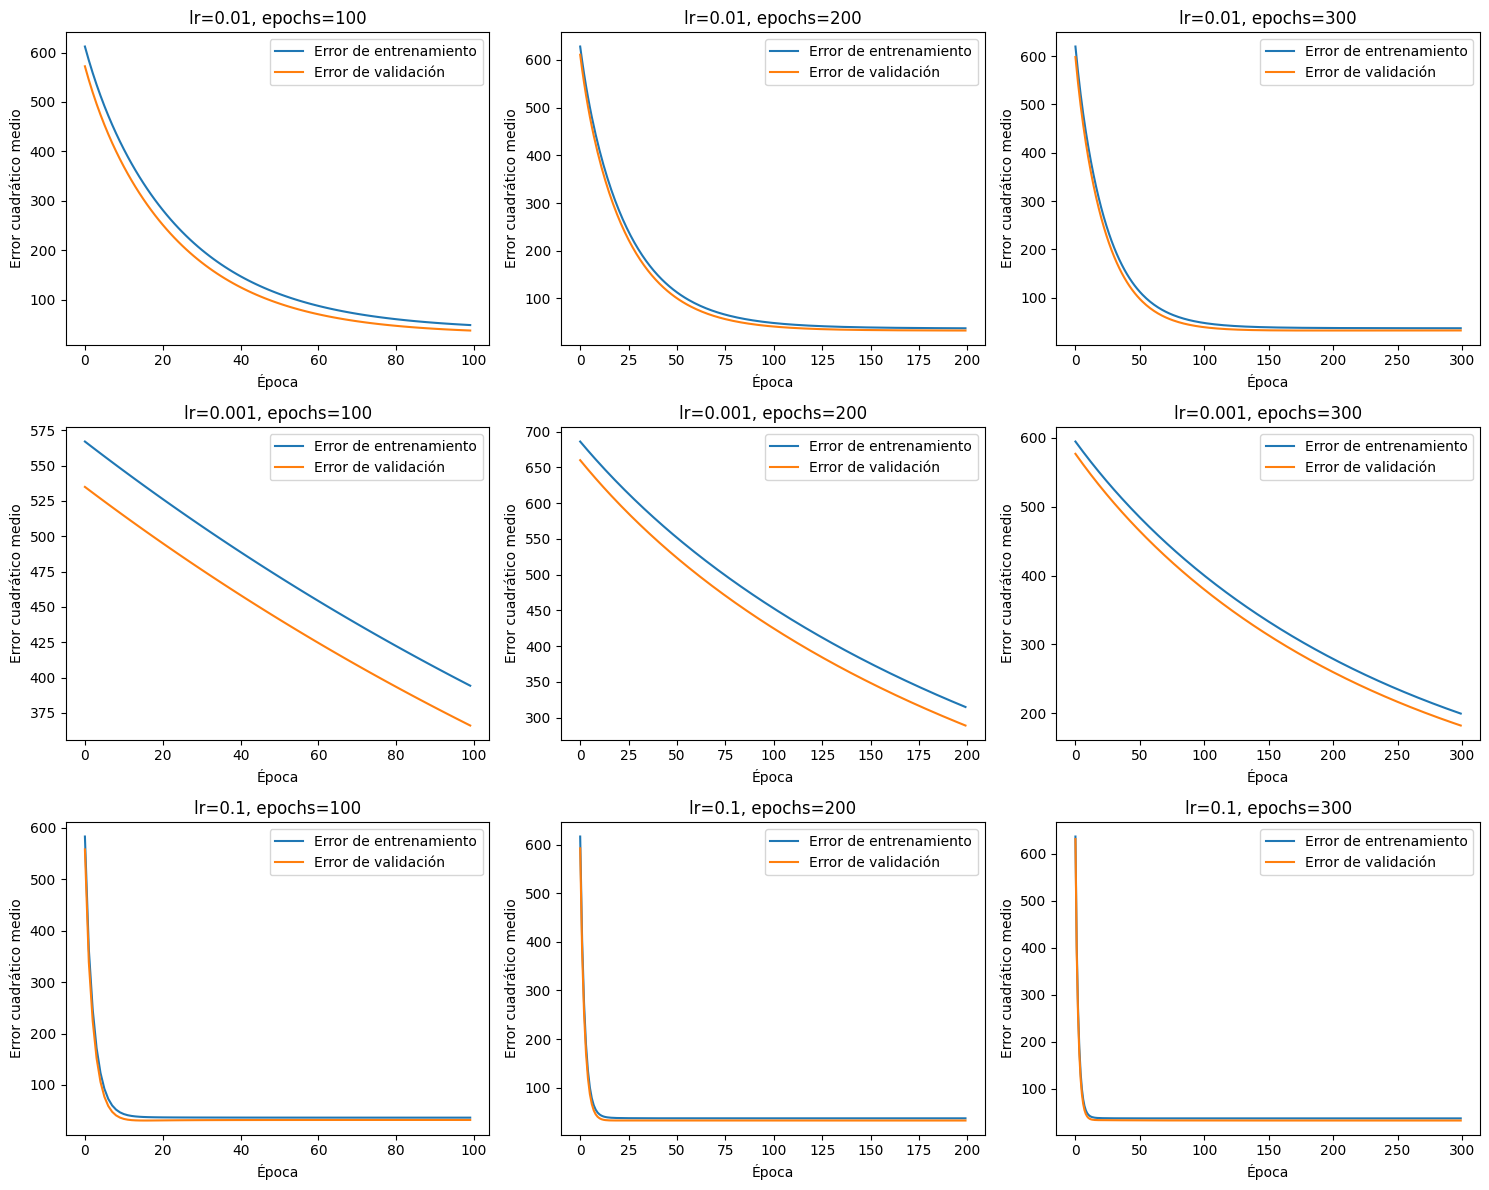

In [433]:
# Calcular el número total de subplots necesarios
plt_totales = len(lr_) * len(epochs)
col = 3
fil = plt_totales // col + (plt_totales % col > 0)  # Filas adicionales si es necesario

# Crear la grilla de subplots
fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()  # Convertir a una lista para indexar fácilmente

# Índice global para los subplots
idx = 0

# Iterar sobre las tasas de aprendizaje y épocas
for lr in lr_:
    for ep in epochs:
        if idx < plt_totales:  # Verificar que no excedamos el número total de subplots
            ax = axes[idx]  # Seleccionar el subplot correspondiente
            gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, lr=lr, epochs=ep, ax=ax)
            idx += 1  # Incrementar el índice global

# Ajustar el espaciado para evitar solapamiento
plt.tight_layout()
plt.show()

Manteniendo las épocas, el lr no puede ser menos que 0.01 ya que no llega a converger por más que las épocas lleguen a 400; en cambio, con 0.1 converge a las 10 epocas aproximadamente.
Manteniendo el lr en 0.01, el gradiente converge siempre en aproximadamente 110 épocas.
Por lo tanto, el valor óptimo de lr se encuentra entre 0.01 y 0.1

In [434]:
#Achicamos el rango de lr
lr_2 = [0.01,0.02,0.04,0.06,0.08,0.09]

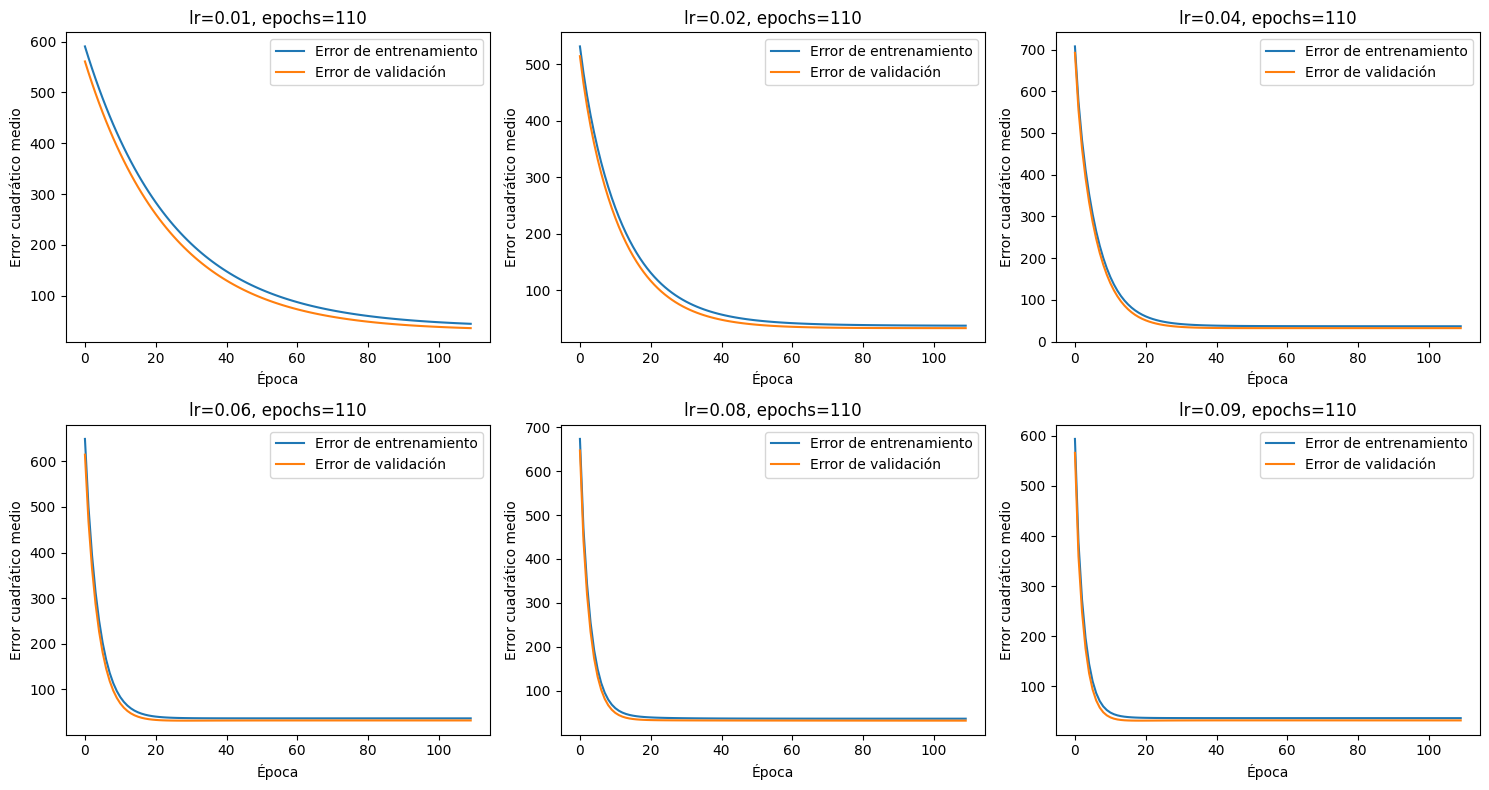

In [435]:
# Calcular el número total de subplots necesarios
plt_totales = len(lr_2)
col = 3
fil = plt_totales // col + (plt_totales % col > 0)  # Filas adicionales si es necesario

# Crear la grilla de subplots
fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()  # Convertir a una lista para indexar fácilmente

# Índice global para los subplots
idx = 0

# Iterar sobre las tasas de aprendizaje y épocas
for lr in lr_2:
    if idx < plt_totales:  # Verificar que no excedamos el número total de subplots
        ax = axes[idx]  # Seleccionar el subplot correspondiente
        gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, lr=lr, epochs=110, ax=ax)
        idx += 1  # Incrementar el índice global

# Ajustar el espaciado para evitar solapamiento
plt.tight_layout()
plt.show()


Podemos notar en Gradiente Descendiente que con un lr entre 0.06 y 0.09 parece ser la mejor opción para definirlo como hiperparametro, ya que esta permite una convergencia más rápida y no parece tener sobreajustes. Las epocas elegimos un valor de 110 para empezar a probar y nos resulto adecuado.

In [436]:
mejor_lr_gd = 0.08

### Gradiente descendiente estocástico

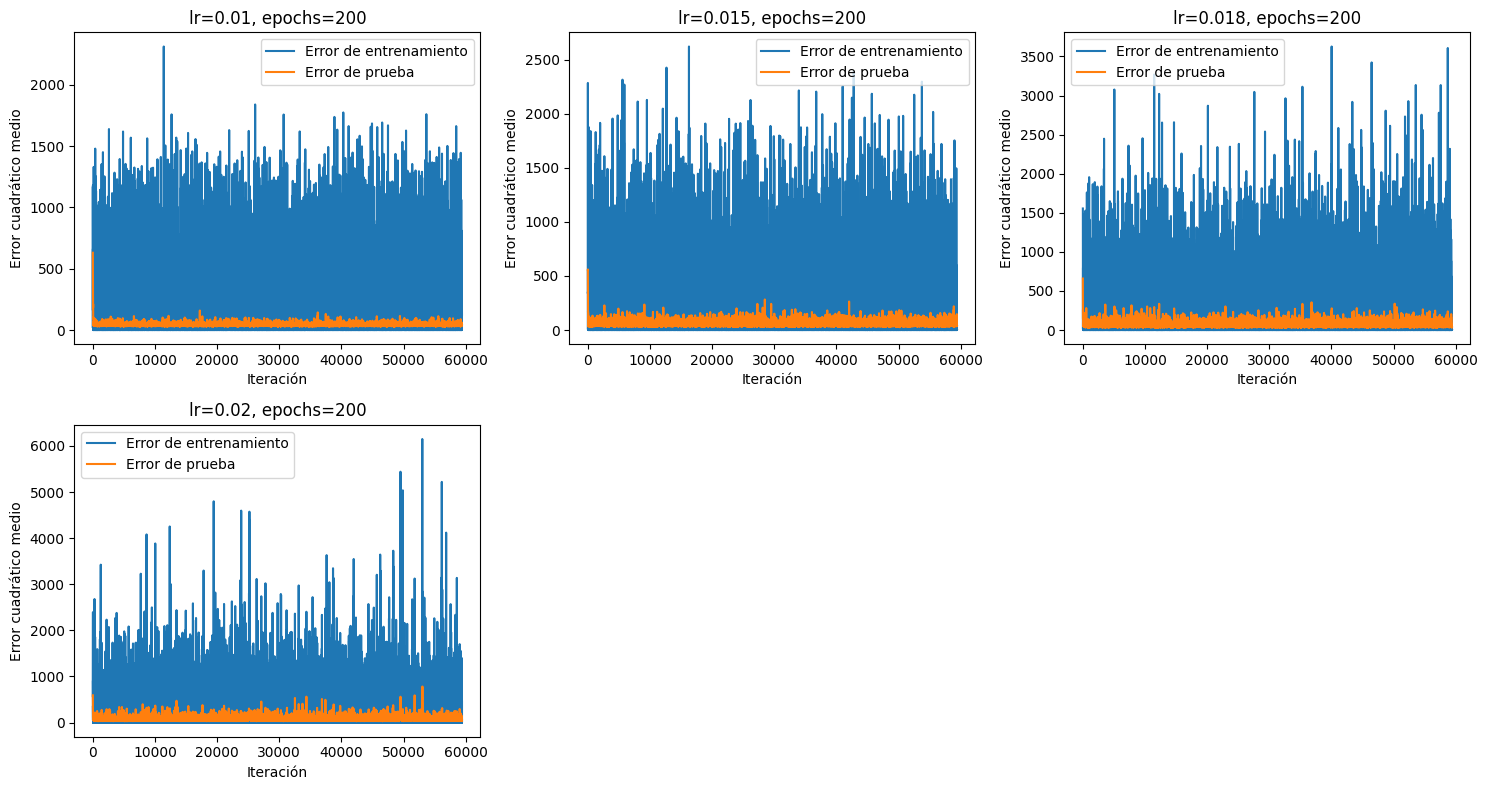

In [437]:
# Calcular el número total de subplots necesarios
lr_st = [0.01,0.015,0.018,0.02]
plt_totales = len(lr_st)  # Asegúrate de que lr_st es la lista correcta
col = 3
fil = plt_totales // col + (plt_totales % col > 0)  # Filas adicionales si es necesario

# Crear la grilla de subplots
fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()  # Convertir a una lista para indexar fácilmente

# Índice global para los subplots
idx = 0

# Iterar sobre las tasas de aprendizaje
for lr in lr_st:
    if idx < plt_totales:  # Verificar que no excedamos el número total de subplots
        ax = axes[idx]  # Seleccionar el subplot correspondiente
        stochastic_gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, lr=lr, epochs=200, ax=ax)
        idx += 1  # Incrementar el índice global

# Desactivar ejes vacíos si hay menos datos que subplots
if plt_totales < len(axes):
    for ax in axes[plt_totales:]:
        ax.axis('off')

# Ajustar el espaciado para evitar solapamiento
plt.tight_layout()
plt.show()


Luego de probar con varios valores en Gradiente descendiente estocástico, pudimos notar que una buena elección de hiperparametro podría ser lr = 0.015 ya que parece ser entre estas cuatro opciones la que tiene más estabilidad y la que converge más rápido.

**no seria mejor 0.01? es más estable**

In [438]:
mejor_lr_gds = 0.015

### Gradiente descendiente mini-batch

In [439]:
lr_2 = [0.01,0.02]
epochs = [100,200]
batch = [18, 21, 24 ,26]

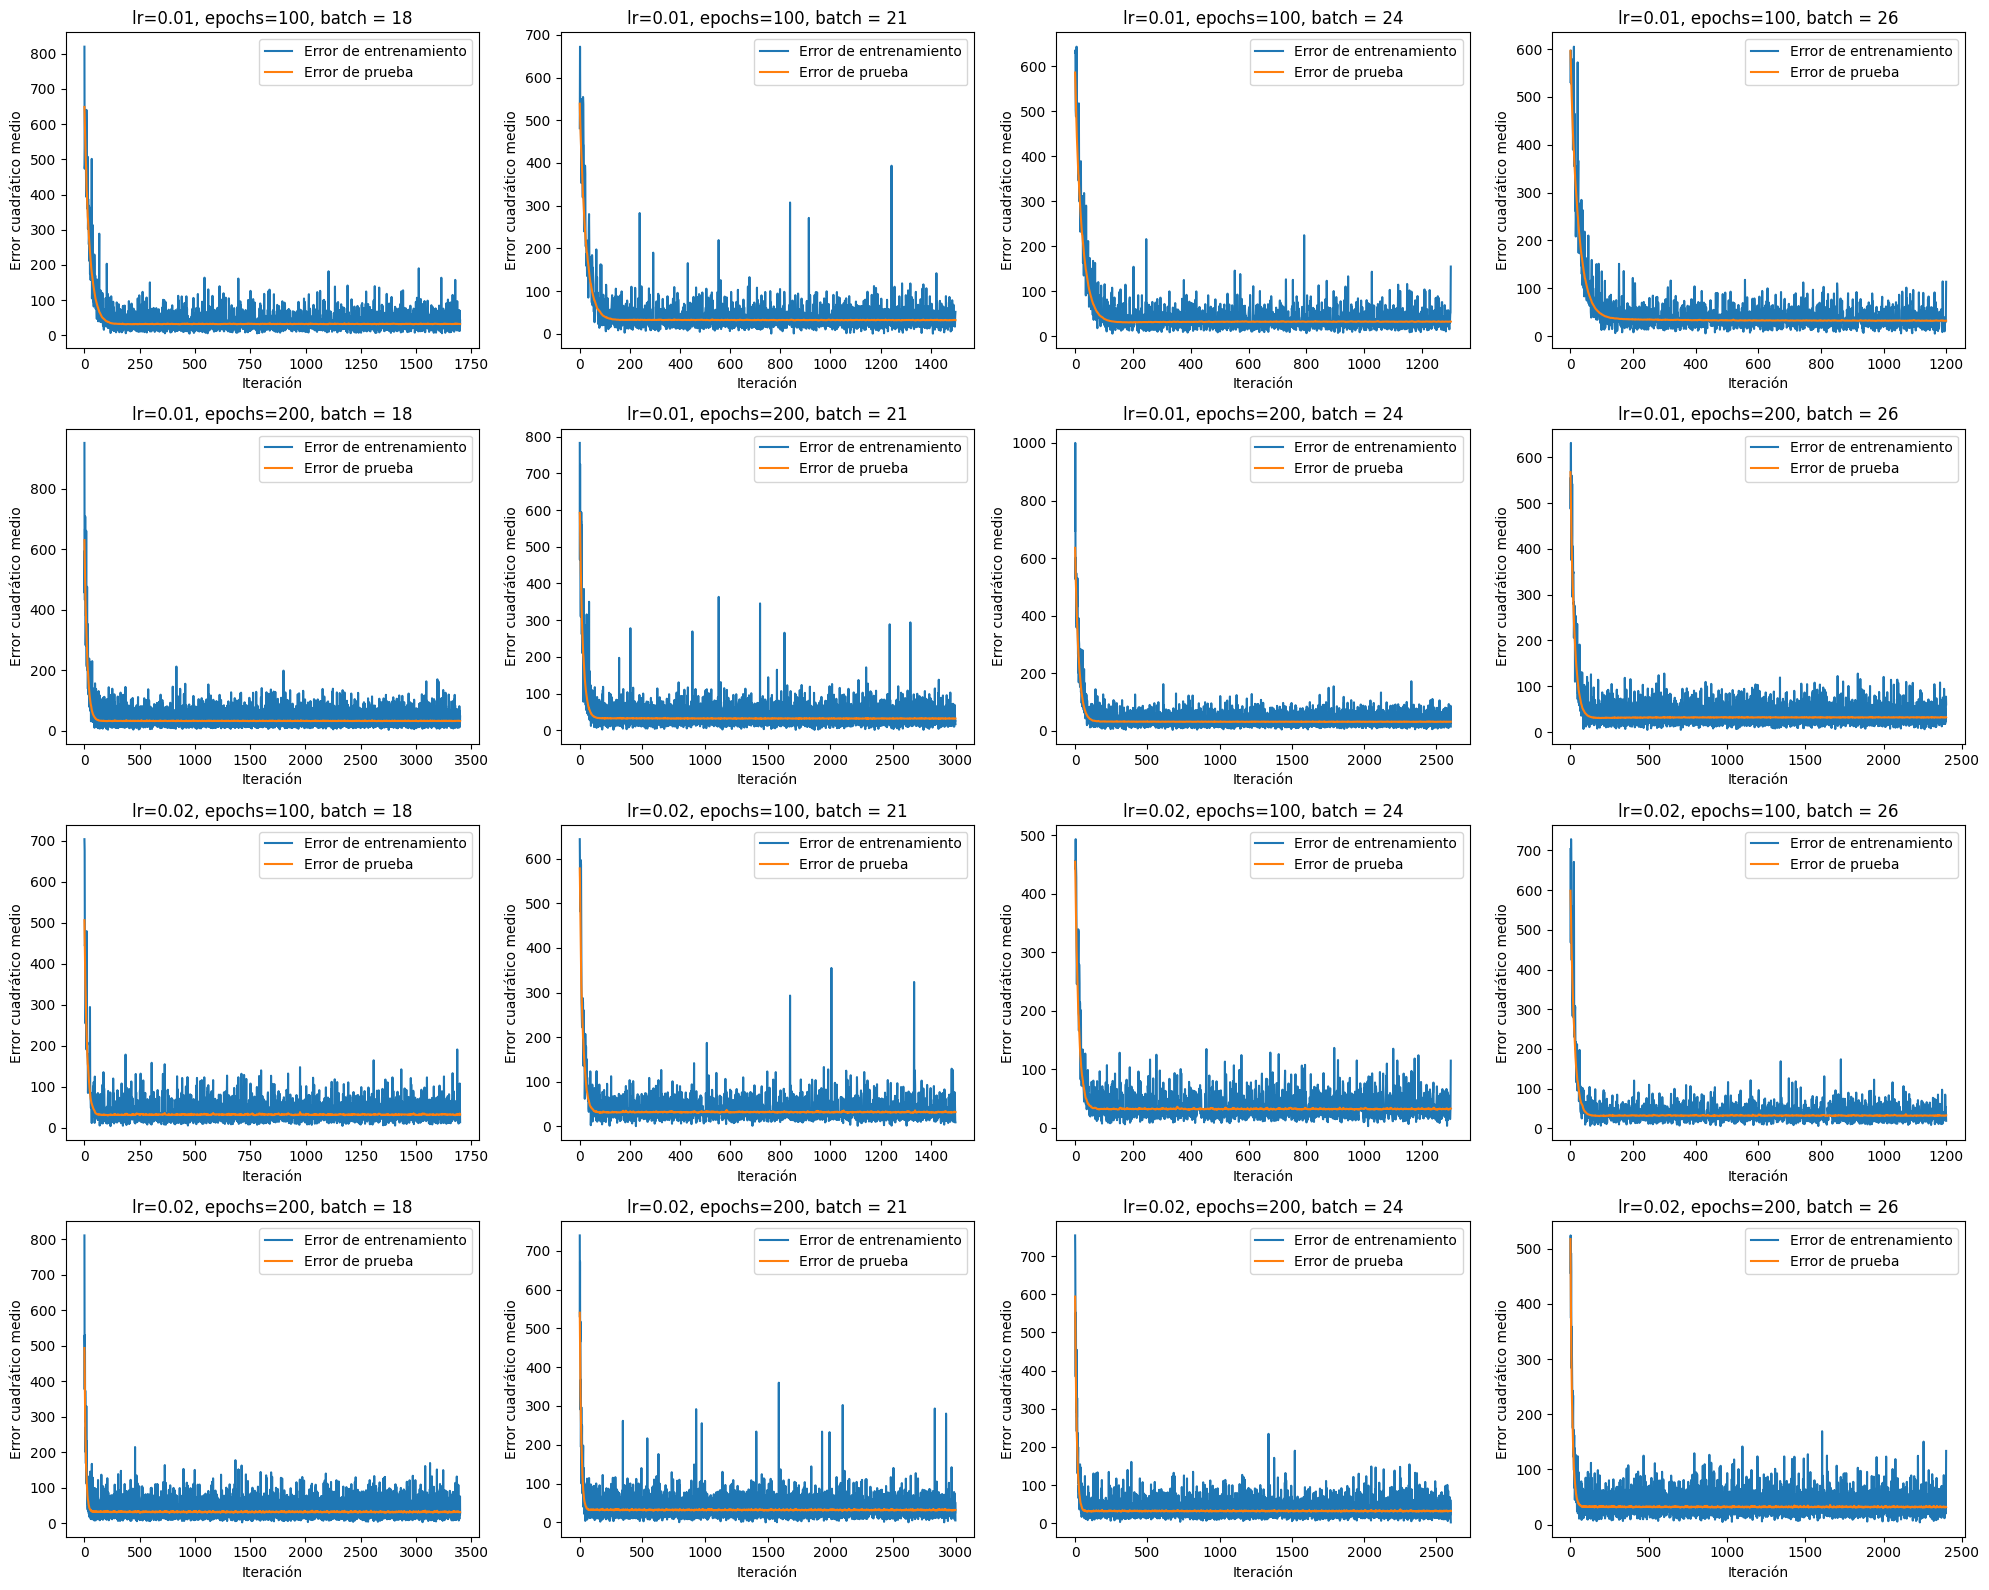

In [440]:
# Calcular el número total de subplots necesarios
plt_totales = len(lr_2) * len(epochs) * len(batch)
col = 4
fil = plt_totales // col + (plt_totales % col > 0)  # Filas adicionales si es necesario

# Crear la grilla de subplots
fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()  # Convertir a una lista para indexar fácilmente

# Índice global para los subplots
idx = 0

# Iterar sobre las tasas de aprendizaje, épocas y tamaños de batch
for lr in lr_2:
    for ep in epochs:
        for b in batch:
            if idx < plt_totales:  # Verificar que no excedamos el número total de subplots
                ax = axes[idx]  # Seleccionar el subplot correspondiente
                mini_batch_gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, lr=lr, epochs=ep, batch_size=b, ax=ax)
                idx += 1  # Incrementar el índice global

# Ajustar el espaciado para evitar solapamiento
plt.tight_layout()
plt.show()

Probamos con distintos lr, epocas y batchsize. Podemos apreciar atraves de los graficos que algunos hiperparametros que podriamos usar parecerian ser lr = 0.01, epocas = 200 y batchsize = 26 ya que estas muestran un valor más balanceado y más estable. Al tenes un batchsize mayor, en este caso hay menor variabilidad de los datos. 

In [441]:
mejor_lr_gdmb = 0.01
mejor_ep_gdmb = 200
mejor_batch_size_gmb = 26

## Métodos de Regularización

In [442]:
alphas= list(np.logspace(-3, 6, 200))

### Ridge

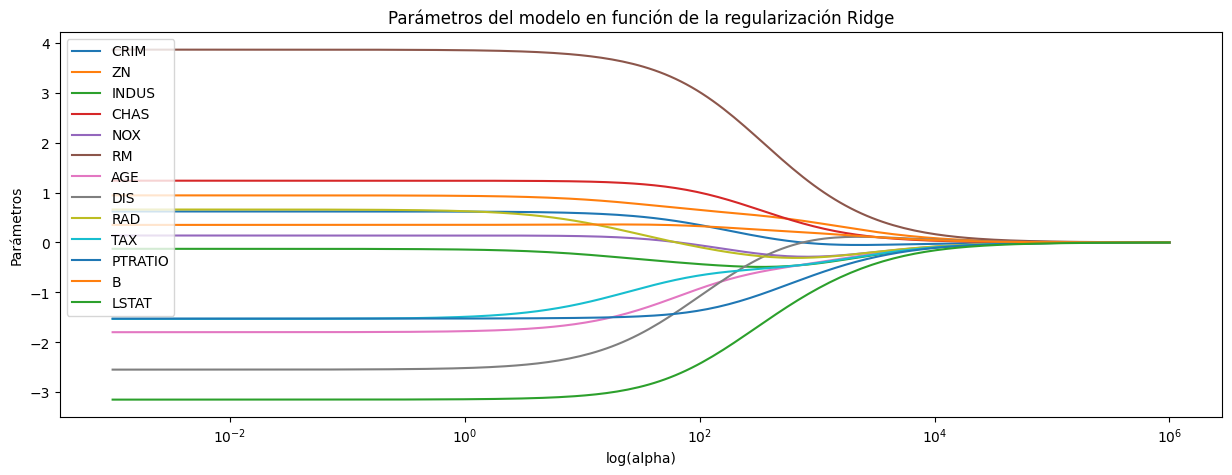

In [443]:
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización Ridge');
plt.axis('tight')
plt.legend()
plt.show()

### Lasso

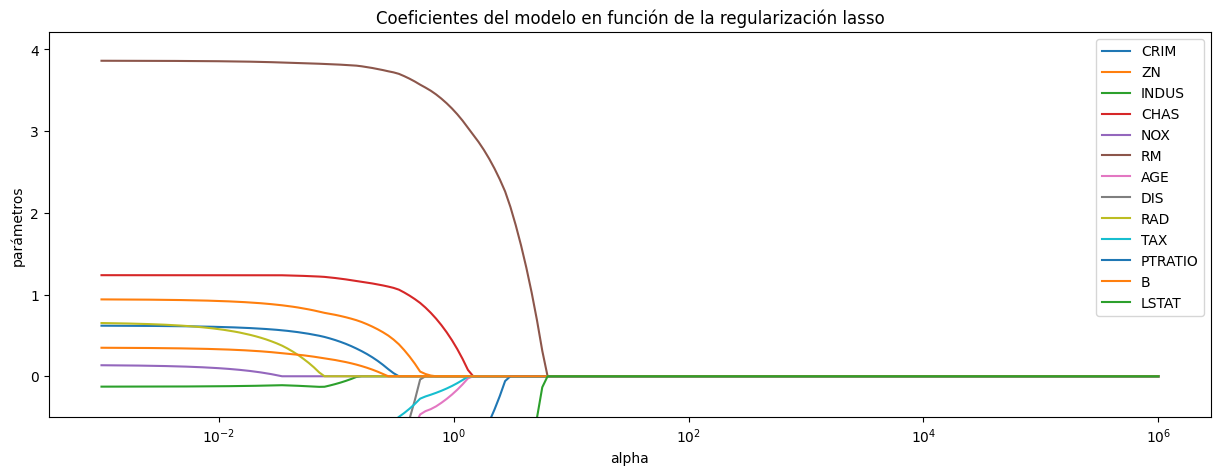

In [444]:
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización lasso')
plt.show()

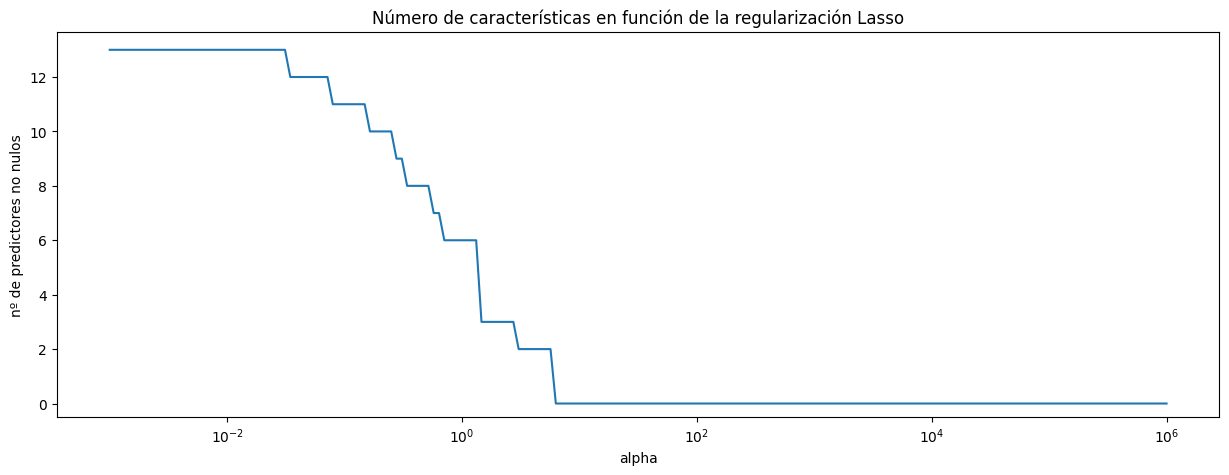

In [497]:
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5, None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº de predictores no nulos')
ax.set_title('Número de características en función de la regularización Lasso')

plt.show()

### Elastic Net

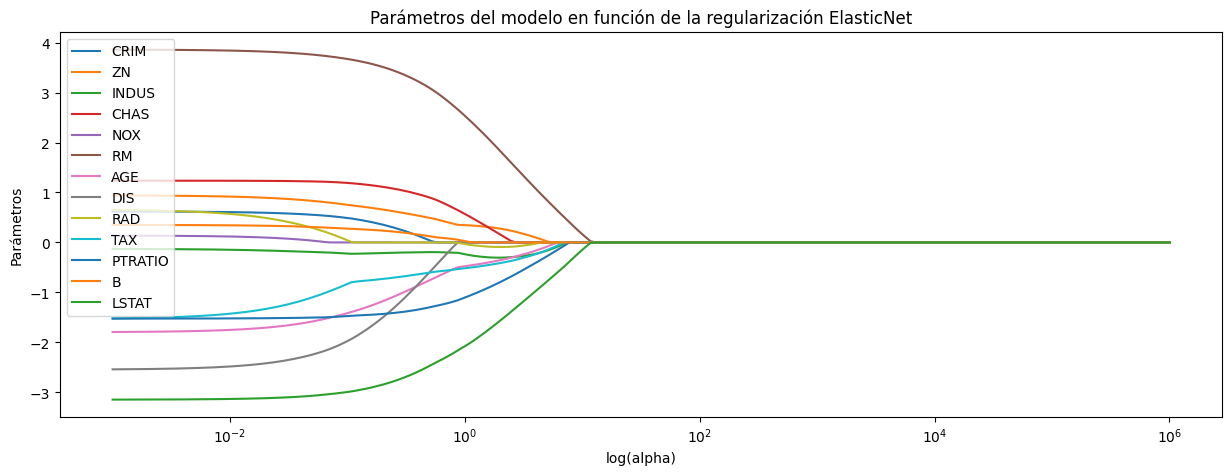

In [446]:
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), ElasticNet(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización ElasticNet');
plt.axis('tight')
plt.legend()
plt.show()

## Mejor hiperparámetro para modelos con método de regularización

In [447]:
def calcular_rmse(model, X_train, y_train, X_val, y_val, alpha = 0.01):
    """
    Calcula el RMSE para un modelo dado en los conjuntos de entrenamiento y prueba.
    """
    #Predicciones
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    #RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    return {'train_rmse': train_rmse,'val_rmse': val_rmse}

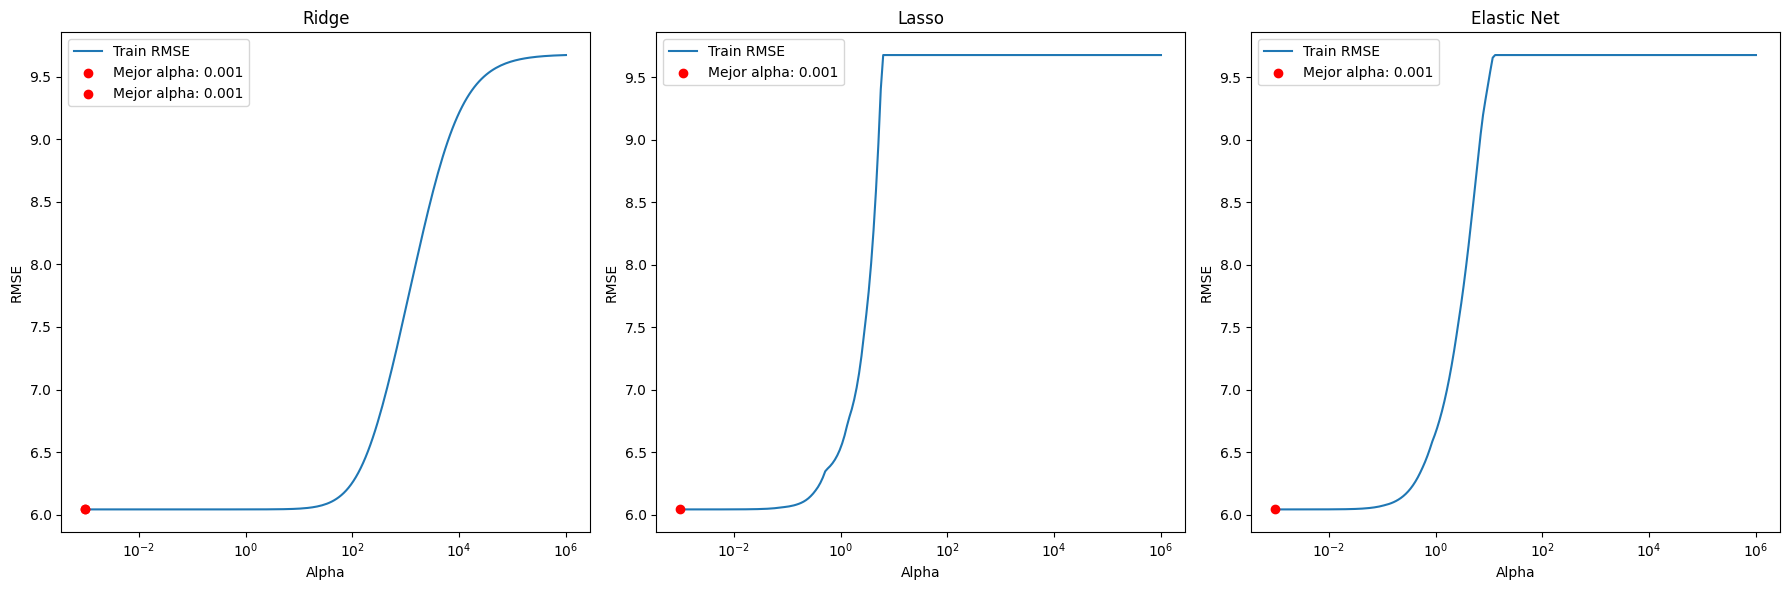

El mejor alpha para Ridge es: 0.001
El mejor alpha para Lasso es: 0.001
El mejor alpha para Elastic Net es: 0.001


In [512]:
def find_best_alpha_for_model(model_class, X_train, y_train, alphas):
    rmse_train = []
    
    # Recorrer los valores de alpha
    for alpha in alphas:
        model = make_pipeline(StandardScaler(), model_class(alpha=alpha))
        model.fit(X_train, y_train)
        
        # Predicciones en el conjunto de entrenamiento
        y_train_pred = model.predict(X_train)
        
        # Calculamos el RMSE en el conjunto de entrenamiento
        rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_train.append(rmse)
    
    # Encontrar el RMSE mínimo
    rmse_minimo = min(rmse_train)
    
    # Encontrar los alphas que tienen el RMSE mínimo
    alphas_con_minimo_rmse = [alphas[i] for i in range(len(alphas)) if rmse_train[i] == rmse_minimo]
    
    # Tomar el alpha más grande con el RMSE mínimo
    alpha_optimo = max(alphas_con_minimo_rmse)
    
    return alpha_optimo, rmse_train

# Ejecutamos la función para cada modelo
mejor_alpha_ridge, rmse_train_ridge = find_best_alpha_for_model(Ridge, X_train, y_train, alphas)
mejor_alpha_lasso, rmse_train_lasso = find_best_alpha_for_model(Lasso, X_train, y_train, alphas)
mejor_alpha_elastic, rmse_train_elastic = find_best_alpha_for_model(ElasticNet, X_train, y_train, alphas)

# Graficar los resultados
plt.figure(figsize=(18, 6))

# Gráfico para Ridge
plt.subplot(131)
plt.plot(alphas, rmse_train_ridge, label='Train RMSE')
plt.scatter(mejor_alpha_elastic, min(rmse_train_elastic), color='red', zorder=5, label=f'Mejor alpha: {mejor_alpha_elastic}')
plt.scatter(mejor_alpha_ridge, min(rmse_train_ridge), color='red', zorder=5, label=f'Mejor alpha: {mejor_alpha_ridge}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge')
plt.legend()

# Gráfico para Lasso
plt.subplot(132)
plt.plot(alphas, rmse_train_lasso, label='Train RMSE')
plt.scatter(mejor_alpha_lasso, min(rmse_train_lasso), color='red', zorder=5, label=f'Mejor alpha: {mejor_alpha_lasso}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Lasso')
plt.legend()

# Gráfico para Elastic Net
plt.subplot(133)
plt.plot(alphas, rmse_train_elastic, label='Train RMSE')
plt.scatter(mejor_alpha_elastic, min(rmse_train_elastic), color='red', zorder=5, label=f'Mejor alpha: {mejor_alpha_elastic}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Elastic Net')
plt.legend()

plt.tight_layout()
plt.show()


print(f'El mejor alpha para Ridge es: {mejor_alpha_ridge}')
print(f'El mejor alpha para Lasso es: {mejor_alpha_lasso}')
print(f'El mejor alpha para Elastic Net es: {mejor_alpha_elastic}')


# Comparación de modelos con sus mejores hiperparámetros

Para comparar entre si los modelos con sus mejores hiperparametros, usaremos el RMSE por su fácil interpretación en las mismas unidades que la variable objetivo y porque penaliza grandes errores más que otras métricas como el MAE, siendo ideal para problemas donde se desean minimizar desviaciones grandes en las predicciones.

## Cálculo error RMSE para cada modelo con los hiperparámetros elegidos en el punto anterior y con el conjunto Test

### Mejores hiperparámetros para cada modelo

In [513]:
##Gradiente descendiente
mejor_lr_gd

#Gradiente descendiente estocástico
mejor_lr_gds

#Gradiente descendiente mini-batch
mejor_lr_gdmb
mejor_ep_gdmb
mejor_batch_size_gmb

#Laso
mejor_alpha_lasso

#Ridge
mejor_alpha_ridge

#Elastic
mejor_alpha_elastic

0.001

In [514]:
dic_metricas_finales = []

In [515]:
calcular_rmse(model_lr, X_train, y_train, X_test, y_test)

{'train_rmse': 6.041975249326456, 'val_rmse': 5.718801878560619}

In [516]:
#Modelos con mejores parámetros
best_lasso = make_pipeline(StandardScaler(), Lasso(alpha=mejor_alpha_lasso))
best_lasso.fit(X_train,y_train)
best_ridge = make_pipeline(StandardScaler(), Ridge(alpha=mejor_alpha_ridge))
best_ridge.fit(X_train,y_train)
best_elastic = make_pipeline(StandardScaler(), ElasticNet(alpha=mejor_alpha_elastic))
best_elastic.fit(X_train,y_train)

##Rmse Linear Regression val y test
rmse_lr_val = calcular_rmse(model_lr, X_train, y_train, X_val, y_val)['val_rmse']
rmse_lr_test = calcular_rmse(model_lr, X_train, y_train, X_test, y_test)['val_rmse']

##Rmse metodos de regularización val y test
rmse_lasso_val = calcular_rmse(best_lasso,X_train,y_train,X_val,y_val)['val_rmse']
rmse_ridge_val = calcular_rmse(best_ridge,X_train,y_train,X_val,y_val)['val_rmse']
rmse_elastic_val = calcular_rmse(best_elastic,X_train,y_train,X_val,y_val)['val_rmse']

rmse_lasso = calcular_rmse(best_lasso,X_train,y_train,X_test,y_test)['val_rmse']
rmse_ridge = calcular_rmse(best_ridge,X_train,y_train,X_test,y_test)['val_rmse']
rmse_elastic = calcular_rmse(best_elastic,X_train,y_train,X_test,y_test)['val_rmse']

###Rmse grdiente descendiente val y test
_, _, _, _, rmse_val_gd = gradient_descent(X_train_scaled,y_train, X_val_scaled, y_val, lr = mejor_lr_gd, epochs = 110, ax = ax)
_, _, _, _, rmse_val_gds = stochastic_gradient_descent(X_train_scaled,y_train, X_val_scaled, y_val, lr = mejor_lr_gds, epochs = 110, ax = ax)
_, _, _, _, rmse_val_gdmb = mini_batch_gradient_descent(X_train_scaled,y_train, X_val_scaled, y_val, lr = mejor_lr_gdmb, epochs = mejor_ep_gdmb, batch_size= mejor_batch_size_gmb,ax = ax)


_, _, _, _, rmse_test_gd = gradient_descent(X_train_scaled,y_train, X_test_scaled, y_test, lr = mejor_lr_gd, epochs = 110, ax = ax)
_, _, _, _, rmse_test_gds = stochastic_gradient_descent(X_train_scaled,y_train, X_test_scaled, y_test, lr = mejor_lr_gds, epochs = 110, ax = ax)
_, _, _, _, rmse_test_gdmb = mini_batch_gradient_descent(X_train_scaled,y_train, X_test_scaled, y_test, lr = mejor_lr_gdmb, epochs = mejor_ep_gdmb, batch_size= mejor_batch_size_gmb,ax = ax)

rmse_val_gd = np.mean(rmse_val_gd)
rmse_val_gds = np.mean(rmse_val_gds)
rmse_val_gdmb = np.mean(rmse_val_gdmb)

rmse_test_gd = np.mean(rmse_test_gd)
rmse_test_gds = np.mean(rmse_test_gds)
rmse_test_gdmb = np.mean(rmse_test_gdmb)

dic_metricas_finales_val= [
    {'Modelo':'Linear Regression', 'RMSE': rmse_lr_val},
    {'Modelo':'Lasso', 'RMSE':rmse_lasso_val},
    {'Modelo': 'Ridge', 'RMSE': rmse_ridge_val},
    {'Modelo':'Elastic Net','RMSE':rmse_elastic_val},
    {'Modelo':'Gradiente Descendiente','RMSE':rmse_val_gd},
    {'Modelo':'Gradiente Descendiente Estocástico','RMSE':rmse_val_gds},
    {'Modelo':'Gradiente Descendiente Mini Batch','RMSE':rmse_val_gdmb}]

dic_metricas_finales_test= [
    {'Modelo':'Linear Regression', 'RMSE': rmse_lr_test},
    {'Modelo':'Lasso', 'RMSE':rmse_lasso},
    {'Modelo': 'Ridge', 'RMSE': rmse_ridge},
    {'Modelo':'Elastic Net','RMSE':rmse_elastic},
    {'Modelo':'Gradiente Descendiente','RMSE':rmse_test_gd},
    {'Modelo':'Gradiente Descendiente Estocástico','RMSE':rmse_test_gds},
    {'Modelo':'Gradiente Descendiente Mini Batch','RMSE':rmse_test_gdmb}]

df_metricas_finales_val = pd.DataFrame(dic_metricas_finales_val)
df_metricas_finales_test = pd.DataFrame(dic_metricas_finales_test)

In [517]:
metricas[[ 'Modelo','val RMSE']].T

,0,1,2,3,4,5,6
Modelo,Regresion Lineal,gradiente descendiente,gradiente descendiente estocástico,gradiente descendiente mini-batch,Lasso,Ridge,Elastic Net
val RMSE,5.61813,5.662692,6.596062,5.64406,6.172546,5.614596,6.197255


In [527]:
# Encuentra el índice del menor valor de RMSE
min_rmse_idx = metricas['val RMSE'].idxmin()

# Selecciona la fila correspondiente usando ese índice
mejor_modelo = metricas.loc[min_rmse_idx]

# Imprime el modelo con el menor RMSE
print(mejor_modelo)

Modelo                Ridge
Train R² Score     0.610243
Train MSE         36.506411
Train RMSE         6.042054
Train MAE          4.014543
Train MAPE        19.865329
val R² Score       0.657711
val MSE           31.523691
val RMSE           5.614596
val MAE            3.788018
val MAPE            20.0544
Name: 5, dtype: object


In [518]:
df_metricas_finales_val.T

,0,1,2,3,4,5,6
Modelo,Linear Regression,Lasso,Ridge,Elastic Net,Gradiente Descendiente,Gradiente Descendiente Estocástico,Gradiente Descendiente Mini Batch
RMSE,5.61813,5.617542,5.618126,5.617299,5.660998,6.458548,5.658131


In [525]:
# Encuentra el índice del menor valor de RMSE
min_rmse_idx = df_metricas_finales_val['RMSE'].idxmin()

# Selecciona la fila correspondiente usando ese índice
mejor_modelo = df_metricas_finales_val.loc[min_rmse_idx]

# Imprime el modelo con el menor RMSE
print(mejor_modelo)

Modelo    Elastic Net
RMSE         5.617299
Name: 3, dtype: object


In [501]:
df_metricas_finales_test.T

,0,1,2,3,4,5,6
Modelo,Linear Regression,Lasso,Ridge,Elastic Net,Gradiente Descendiente,Gradiente Descendiente Estocástico,Gradiente Descendiente Mini Batch
RMSE,5.718802,5.720465,5.718805,5.720042,6.001821,7.033517,5.991371


In [523]:
# Encuentra el índice del menor valor de RMSE
min_rmse_idx = df_metricas_finales_test['RMSE'].idxmin()

# Selecciona la fila correspondiente usando ese índice
mejor_modelo = df_metricas_finales_test.loc[min_rmse_idx]

# Imprime el modelo con el menor RMSE
print(mejor_modelo)

Modelo    Linear Regression
RMSE               5.718802
Name: 0, dtype: object


# Conclusiones